In [1]:
import json
import pandas as pd

def load_json_in_chunks(file_path, chunk_size=100_000):
    """
    Generator that reads a JSON-lines file in chunks
    and yields cleaned Pandas DataFrames.
    """
    records = []

    with open(file_path, "r", encoding="utf-8") as f:
        for i, line in enumerate(f, start=1):
            records.append(json.loads(line))

            if i % chunk_size == 0:
                df = pd.DataFrame(records)
                yield df
                records = []

        # Yield remaining records
        if records:
            df = pd.DataFrame(records)
            yield df


In [2]:
BUSINESS_FILE = "yelp_academic_dataset_business.json"

business_chunks = []

for chunk in load_json_in_chunks(BUSINESS_FILE):
    # Basic cleaning
    chunk["categories"] = chunk["categories"].fillna("")
    chunk["attributes"] = chunk["attributes"].astype(str)
    chunk["hours"] = chunk["hours"].astype(str)

    business_chunks.append(chunk)

business_df = pd.concat(business_chunks, ignore_index=True)

business_df.shape


(150346, 14)

In [3]:
import json
import pandas as pd

def load_reviews_in_chunks(file_path, chunk_size=100_000):
    records = []

    with open(file_path, "r", encoding="utf-8") as f:
        for i, line in enumerate(f, start=1):
            records.append(json.loads(line))

            if i % chunk_size == 0:
                df = pd.DataFrame(records)

                # ------------------
                # Cleaning logic
                # ------------------
                df["date"] = pd.to_datetime(df["date"], errors="coerce")
                df["stars"] = df["stars"].astype(int)

                df = df.dropna(
                    subset=["review_id", "user_id", "business_id"]
                )

                yield df
                records = []

        # Final remainder
        if records:
            df = pd.DataFrame(records)
            df["date"] = pd.to_datetime(df["date"], errors="coerce")
            df["stars"] = df["stars"].astype(int)
            df = df.dropna(
                subset=["review_id", "user_id", "business_id"]
            )
            yield df


# Load all review chunks
review_chunks = []

for chunk in load_reviews_in_chunks("yelp_academic_dataset_review.json"):
    review_chunks.append(chunk)

reviews_df = pd.concat(review_chunks, ignore_index=True)

reviews_df.shape


(6990280, 9)

In [4]:
def load_users_in_chunks(file_path, chunk_size=100_000):
    records = []

    with open(file_path, "r", encoding="utf-8") as f:
        for i, line in enumerate(f, start=1):
            records.append(json.loads(line))

            if i % chunk_size == 0:
                df = pd.DataFrame(records)

                # ------------------
                # Cleaning logic
                # ------------------
                df["yelping_since"] = pd.to_datetime(
                    df["yelping_since"], errors="coerce"
                )

                df["elite"] = df["elite"].fillna("")
                df["friends"] = df["friends"].fillna("")

                yield df
                records = []

        # Final remainder
        if records:
            df = pd.DataFrame(records)
            df["yelping_since"] = pd.to_datetime(
                df["yelping_since"], errors="coerce"
            )
            df["elite"] = df["elite"].fillna("")
            df["friends"] = df["friends"].fillna("")
            yield df


# Load all user chunks
user_chunks = []

for chunk in load_users_in_chunks("yelp_academic_dataset_user.json"):
    user_chunks.append(chunk)

users_df = pd.concat(user_chunks, ignore_index=True)

users_df.shape


(1987897, 22)

In [5]:
TIP_FILE = "yelp_academic_dataset_tip.json"

tip_chunks = []

for chunk in load_json_in_chunks(TIP_FILE):
    chunk["date"] = pd.to_datetime(chunk["date"], errors="coerce")
    tip_chunks.append(chunk)

tip_df = pd.concat(tip_chunks, ignore_index=True)

tip_df.shape


(908915, 5)

In [36]:
CHECKIN_FILE = "yelp_academic_dataset_checkin.json"

checkin_chunks = []

for chunk in load_json_in_chunks(CHECKIN_FILE):
    chunk["checkin_count"] = chunk["date"].apply(
        lambda x: len(x.split(",")) if isinstance(x, str) else 0
    )
    checkin_chunks.append(chunk)

checkin_df = pd.concat(checkin_chunks, ignore_index=True)

checkin_df.shape


(131930, 3)

In [7]:
PHOTO_FILE = "photos.json"

photo_chunks = []

for chunk in load_json_in_chunks(PHOTO_FILE):
    photo_chunks.append(chunk)

photo_df = pd.concat(photo_chunks, ignore_index=True)

photo_df.shape


(200100, 4)

In [8]:
# Overview of each dataset
datasets = {
    "users": users_df,
    "reviews": reviews_df,
    "businesses": business_df,
    "tips": tip_df,
    "checkins": checkin_df,
    "photos": photo_df
}

for name, df in datasets.items():
    print(f"\n{name.upper()} DATASET")
    print("Shape:", df.shape)
    display(df.head())



USERS DATASET
Shape: (1987897, 22)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0



REVIEWS DATASET
Shape: (6990280, 9)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15



BUSINESSES DATASET
Shape: (150346, 14)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."



TIPS DATASET
Shape: (908915, 5)


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0



CHECKINS DATASET
Shape: (131930, 3)


,business_id,date,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...",11
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011...",10
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22",2
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012...",10
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014...",26



PHOTOS DATASET
Shape: (200100, 4)


,photo_id,business_id,caption,label
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside
1,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,,outside
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food
4,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food


In [9]:
for name, df in datasets.items():
    print(f"\n{name.upper()} DATA TYPES")
    print(df.info())



USERS DATA TYPES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype         
---  ------              -----         
 0   user_id             object        
 1   name                object        
 2   review_count        int64         
 3   yelping_since       datetime64[ns]
 4   useful              int64         
 5   funny               int64         
 6   cool                int64         
 7   elite               object        
 8   friends             object        
 9   fans                int64         
 10  average_stars       float64       
 11  compliment_hot      int64         
 12  compliment_more     int64         
 13  compliment_profile  int64         
 14  compliment_cute     int64         
 15  compliment_list     int64         
 16  compliment_note     int64         
 17  compliment_plain    int64         
 18  compliment_cool     int64         
 19  compliment_funny    int6

In [10]:
print("Unique Users:", users_df["user_id"].nunique())
print("Unique Reviewers:", reviews_df["user_id"].nunique())
print("Unique Businesses:", business_df["business_id"].nunique())
print("Unique Businesses Reviewed:", reviews_df["business_id"].nunique())


Unique Users: 1987897
Unique Reviewers: 1987929
Unique Businesses: 150346
Unique Businesses Reviewed: 150346


In [11]:
reviews_df["stars"].value_counts().sort_index()

stars
1    1069561
2     544240
3     691934
4    1452918
5    3231627
Name: count, dtype: int64

In [12]:
business_df["stars"].describe()

count    150346.000000
mean          3.596724
std           0.974421
min           1.000000
25%           3.000000
50%           3.500000
75%           4.500000
max           5.000000
Name: stars, dtype: float64

In [13]:
business_df["state"].value_counts().head(10)


state
PA    34039
FL    26330
TN    12056
IN    11247
MO    10913
LA     9924
AZ     9912
NJ     8536
NV     7715
AB     5573
Name: count, dtype: int64

In [14]:
users_df[["review_count", "average_stars", "fans"]].describe()


,review_count,average_stars,fans
count,1.987897e+06,1.987897e+06,1.987897e+06
mean,2.339441e+01,3.630494e+00,1.465740e+00
std,8.256699e+01,1.183337e+00,1.813075e+01
min,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.000000e+00,3.000000e+00,0.000000e+00
50%,5.000000e+00,3.880000e+00,0.000000e+00
75%,1.700000e+01,4.560000e+00,0.000000e+00
max,1.747300e+04,5.000000e+00,1.249700e+04


In [15]:
business_df["categories"].str.split(",").explode().value_counts().head(20)

categories
 Restaurants                  36978
 Food                         20998
 Shopping                     18915
Restaurants                   15290
 Home Services                10563
 Nightlife                     9990
 Beauty & Spas                 9907
 Bars                          9130
 Health & Medical              8832
 Local Services                8556
 Event Planning & Services     7828
 Automotive                    7324
Food                           6783
 Sandwiches                    6645
 American (Traditional)        6504
 Active Life                   5768
Shopping                       5480
 Coffee & Tea                  5153
 Breakfast & Brunch            5110
 Fast Food                     5073
Name: count, dtype: int64

# Initial Data Exploration for Coffee related businesses only 

In [8]:
coffee_categories = (
    business_df["categories"]
    .dropna()
    .str.split(",")
    .explode()
    .str.strip()
    .str.lower()
)

coffee_categories[
    coffee_categories.str.contains("coffee")
].value_counts().head(10)

categories
coffee & tea             6703
coffee roasteries         278
coffeeshops                 8
coffee & tea supplies       5
Name: count, dtype: int64

In [9]:
coffee_df = business_df[
    business_df["categories"]
    .str.contains("coffee", case=False, na=False)
]

coffee_df.shape


(6728, 14)

In [10]:
coffee_df["city"].value_counts().head(10)

city
Philadelphia    896
Tampa           397
Edmonton        351
New Orleans     318
Tucson          318
Nashville       313
Indianapolis    302
Reno            216
Saint Louis     142
Boise           138
Name: count, dtype: int64

In [176]:
coffee_df["state"].value_counts().head(10)

state
PA    1729
FL    1113
TN     496
LA     474
IN     469
MO     427
NJ     410
AB     380
AZ     352
NV     269
Name: count, dtype: int64

In [19]:
coffee_df["stars"].describe()

count    6728.000000
mean        3.521254
std         1.011856
min         1.000000
25%         3.000000
50%         4.000000
75%         4.500000
max         5.000000
Name: stars, dtype: float64

In [20]:
coffee_df["review_count"].describe()

count    6728.000000
mean       63.990042
std       147.840137
min         5.000000
25%        11.000000
50%        25.000000
75%        59.000000
max      5721.000000
Name: review_count, dtype: float64

In [179]:
top_coffee = coffee_df[
    (coffee_df["review_count"] >= 200) &
    (coffee_df["stars"] >= 4.0)
].sort_values("review_count", ascending=False)

top_coffee[["name", "city", "state", "stars", "review_count", "categories"]].head(10)

,name,city,state,stars,review_count,categories
143157,Reading Terminal Market,Philadelphia,PA,4.5,5721,"Candy Stores, Shopping, Department Stores, Fas..."
126929,Cafe Beignet on Royal Street,New Orleans,LA,4.0,2688,"Cafes, Breakfast & Brunch, Food, Restaurants, ..."
147511,The Franklin Fountain,Philadelphia,PA,4.0,2062,"Ice Cream & Frozen Yogurt, Coffee & Tea, Food,..."
1971,District Donuts Sliders Brew,New Orleans,LA,4.5,2062,"Food, Donuts, Burgers, American (Traditional),..."
23788,Willa Jean,New Orleans,LA,4.0,2010,"Bakeries, Breakfast & Brunch, Food, Restaurant..."
33534,Café Du Monde,New Orleans,LA,4.0,1880,"Flowers & Gifts, Gift Shops, Cafes, Restaurant..."
121653,Oxford Exchange,Tampa,FL,4.5,1868,"Restaurants, American (New), Coffee & Tea, Boo..."
4639,Cafe Fleur De Lis,New Orleans,LA,4.0,1865,"Breakfast & Brunch, Coffee & Tea, Food, Restau..."
18273,Bodega,Saint Petersburg,FL,4.5,1772,"Spanish, Cafes, Cuban, Latin American, Juice B..."
5940,Milk and Honey Nashville,Nashville,TN,4.0,1725,"American (New), Restaurants, American (Traditi..."


In [22]:
coffee_df["is_open"].value_counts(normalize=True) * 100

is_open
1    73.944709
0    26.055291
Name: proportion, dtype: float64

In [23]:
coffee_df["categories"].value_counts().head(20)

categories
Food, Coffee & Tea                                     508
Coffee & Tea, Food                                     473
Food, Donuts, Coffee & Tea                              73
Donuts, Coffee & Tea, Food                              65
Donuts, Food, Coffee & Tea                              57
Food, Coffee & Tea, Donuts                              56
Coffee & Tea, Donuts, Food                              55
Coffee & Tea, Food, Donuts                              55
Restaurants, Coffee & Tea, Food                         38
Food, Coffee & Tea, Restaurants                         31
Coffee & Tea, Restaurants, Food                         30
Food, Restaurants, Coffee & Tea                         28
Restaurants, Food, Coffee & Tea                         27
Coffee & Tea, Food, Restaurants                         25
Coffee Roasteries, Food, Coffee & Tea                   19
Coffee & Tea, Food, Coffee Roasteries                   17
Fast Food, Coffee & Tea, Burgers, Restaurants

# Descriptive Stats

In [14]:
coffee_ids = set(coffee_df["business_id"])

len(coffee_ids)

6728

In [15]:
coffee_reviews = reviews_df[
    reviews_df["business_id"].isin(coffee_ids)
]
len(coffee_reviews)

444691

In [26]:
coffee_review_stats = (
    coffee_reviews
    .groupby("business_id")
    .agg(
        review_count=("review_id", "count"),
        avg_rating=("stars", "mean")
    )
)

coffee_review_stats.describe()


,review_count,avg_rating
count,6728.000000,6728.000000
mean,66.095571,3.517584
std,151.298295,0.999095
min,5.000000,1.000000
25%,11.000000,2.809066
50%,26.000000,3.765069
75%,61.000000,4.333333
max,5778.000000,5.000000


In [27]:
coffee_checkins = checkin_df.loc[
    checkin_df["business_id"].isin(coffee_ids),
    ["business_id"]
]

coffee_checkin_counts = (
    coffee_checkins
    .groupby("business_id")
    .size()
    .rename("checkin_count")
)

coffee_checkin_counts.describe()


count    6665.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: checkin_count, dtype: float64

In [28]:
coffee_tips = tip_df.loc[
    tip_df["business_id"].isin(coffee_ids),
    ["business_id"]
]

coffee_tip_counts = (
    coffee_tips
    .groupby("business_id")
    .size()
    .rename("tip_count")
)

coffee_tip_counts.describe()

count    5950.000000
mean       12.639664
std        41.299665
min         1.000000
25%         2.000000
50%         5.000000
75%        12.000000
max      2571.000000
Name: tip_count, dtype: float64

In [29]:
coffee_photos = photo_df.loc[
    photo_df["business_id"].isin(coffee_ids),
    ["business_id"]
]

coffee_photo_counts = (
    coffee_photos
    .groupby("business_id")
    .size()
    .rename("photo_count")
)

coffee_photo_counts.describe()

count    4221.000000
mean        5.606491
std        11.971346
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       528.000000
Name: photo_count, dtype: float64

In [30]:
import pandas as pd

In [31]:
coffee_engagement = (
    coffee_review_stats
    .join(coffee_checkin_counts, how="left")
    .join(coffee_tip_counts, how="left")
    .join(coffee_photo_counts, how="left")
    .fillna(0)
)

coffee_engagement["engagement_bucket"] = pd.qcut(
    coffee_engagement["review_count"],
    q=3,
    labels=["Low", "Medium", "High"]
)

coffee_engagement.groupby("engagement_bucket").agg(
    avg_rating=("avg_rating", "mean"),
    median_reviews=("review_count", "median"),
    business_count=("review_count", "count")
)

C:\Users\hp\AppData\Local\Temp\ipykernel_8960\2443579058.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  coffee_engagement.groupby("engagement_bucket").agg(


,avg_rating,median_reviews,business_count
engagement_bucket,,,
Low,3.365584,9.0,2315
Medium,3.306072,26.0,2180
High,3.881658,95.0,2233


In [32]:
coffee_city_stats = (
    coffee_df
    .groupby("city")
    .agg(
        avg_rating=("stars", "mean"),
        rating_std=("stars", "std"),
        median_reviews=("review_count", "median"),
        business_count=("business_id", "count")
    )
    .sort_values("business_count", ascending=False)
)

coffee_city_stats.head(10)

,avg_rating,rating_std,median_reviews,business_count
city,,,,
Philadelphia,3.547433,0.961106,31.0,896
Tampa,3.591940,1.020490,28.0,397
Edmonton,3.572650,0.855900,12.0,351
New Orleans,3.872642,0.805329,47.0,318
Tucson,3.515723,0.983975,32.0,318
Nashville,3.658147,0.965630,40.0,313
Indianapolis,3.544702,1.080861,31.0,302
Reno,3.636574,0.946772,46.5,216
Saint Louis,3.883803,0.766463,32.0,142


In [33]:
coffee_state_stats = (
    coffee_df
    .groupby("state")
    .agg(
        avg_rating=("stars", "mean"),
        rating_std=("stars", "std"),
        median_reviews=("review_count", "median"),
        business_count=("business_id", "count")
    )
    .sort_values("business_count", ascending=False)
)

coffee_state_stats.head(5)

,avg_rating,rating_std,median_reviews,business_count
state,,,,
PA,3.459225,0.990807,22.0,1729
FL,3.537287,1.074643,27.0,1113
TN,3.557460,1.050361,32.0,496
LA,3.665612,0.967494,37.5,474
IN,3.543710,1.038113,30.0,469


In [34]:
coffee_df.groupby("is_open").agg(
    avg_rating=("stars", "mean"),
    median_reviews=("review_count", "median"),
    business_count=("business_id", "count")
)

,avg_rating,median_reviews,business_count
is_open,,,
0,3.820023,23.0,1753
1,3.415980,25.0,4975


In [35]:
coffee_engagement_summary = (
    coffee_review_stats
    .join(coffee_checkin_counts, how="left")
    .join(coffee_tip_counts, how="left")
    .join(coffee_photo_counts, how="left")
    .fillna(0)
)

coffee_engagement_summary.describe()

,review_count,avg_rating,checkin_count,tip_count,photo_count
count,6728.000000,6728.000000,6728.000000,6728.000000,6728.000000
mean,66.095571,3.517584,0.990636,11.178062,3.517390
std,151.298295,0.999095,0.096320,39.047883,9.861686
min,5.000000,1.000000,0.000000,0.000000,0.000000
25%,11.000000,2.809066,1.000000,2.000000,0.000000
50%,26.000000,3.765069,1.000000,4.000000,1.000000
75%,61.000000,4.333333,1.000000,11.000000,4.000000
max,5778.000000,5.000000,1.000000,2571.000000,528.000000


###Differences between individual engagement summaries and the combined engagement table arise because the combined analysis includes all coffee businesses, assigning zero values to those without recorded engagement. This provides a more complete and realistic view of customer interaction across the market.

In [36]:
coffee_df = coffee_df.copy()

coffee_df["has_hours"] = coffee_df["hours"].notna()

coffee_df.groupby("has_hours").agg(
    avg_rating=("stars", "mean"),
    median_reviews=("review_count", "median"),
    business_count=("business_id", "count")
)

,avg_rating,median_reviews,business_count
has_hours,,,
True,3.521254,25.0,6728


In [37]:
coffee_analysis = (
    coffee_review_stats
    .join(coffee_checkin_counts, how="left")
    .join(coffee_tip_counts, how="left")
    .join(coffee_photo_counts, how="left")
    .fillna(0)
)

coffee_analysis.head()

,review_count,avg_rating,checkin_count,tip_count,photo_count
business_id,,,,,
-0epFLgYq2C1Jo_W4FOBKw,18,4.222222,1.0,1.0,1.0
-0gRYq5UjMtZbELj0KHxzA,133,3.593985,1.0,26.0,2.0
-0iIxySkp97WNlwK66OGWg,233,3.721030,1.0,28.0,2.0
-2BDt9OdGiBONysWCdKgNg,17,3.000000,1.0,10.0,6.0
-2dvQxx3cYXd5XmFdDDsDA,27,2.370370,1.0,1.0,0.0


In [38]:
coffee_analysis[[
    "review_count",
    "avg_rating",
    "tip_count",
    "photo_count",
    "checkin_count"
]].agg(
    ["count", "mean", "median", "min", "max"]
)

,review_count,avg_rating,tip_count,photo_count,checkin_count
count,6728.000000,6728.000000,6728.000000,6728.00000,6728.000000
mean,66.095571,3.517584,11.178062,3.51739,0.990636
median,26.000000,3.765069,4.000000,1.00000,1.000000
min,5.000000,1.000000,0.000000,0.00000,0.000000
max,5778.000000,5.000000,2571.000000,528.00000,1.000000


In [39]:
coffee_analysis[[
    "review_count",
    "tip_count",
    "photo_count"
]].quantile([0.25, 0.5, 0.75, 1.0])

,review_count,tip_count,photo_count
0.25,11.0,2.0,0.0
0.50,26.0,4.0,1.0
0.75,61.0,11.0,4.0
1.00,5778.0,2571.0,528.0


In [40]:
coffee_analysis["review_count"].mode()
coffee_analysis["avg_rating"].mode()

0    4.0
Name: avg_rating, dtype: float64

In [41]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

pysqldf("""
SELECT
    COUNT(*) AS business_count,
    AVG(review_count) AS avg_reviews,
    AVG(avg_rating) AS avg_rating
FROM coffee_analysis
""")

,business_count,avg_reviews,avg_rating
0,6728,66.095571,3.517584


In [42]:
# Convert column to list
coffee_ids_list = coffee_df["business_id"].to_list()

# Access raw values
ratings_array = coffee_analysis["avg_rating"].values

# Concatenate tables (example)
combined = pd.concat(
    [coffee_review_stats, coffee_tip_counts],
    axis=1
)

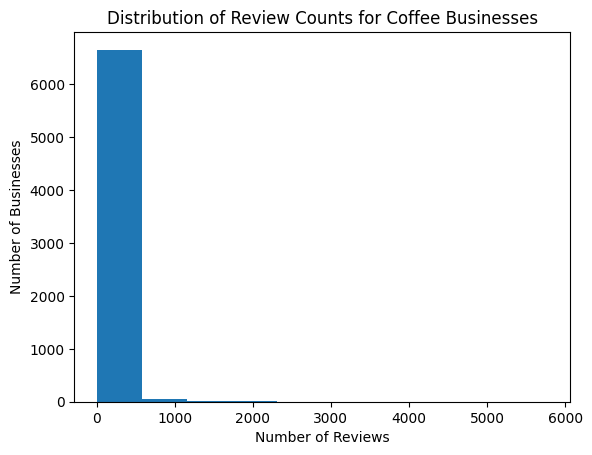

In [43]:
import matplotlib.pyplot as plt

plt.hist(coffee_analysis["review_count"], bins=10)
plt.title("Distribution of Review Counts for Coffee Businesses")
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Businesses")
plt.show()

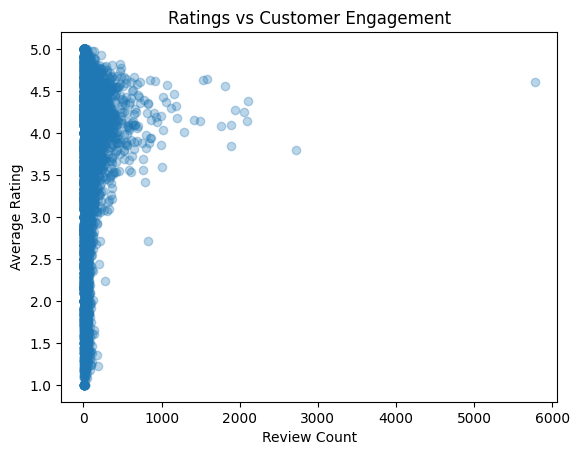

In [44]:
plt.scatter(
    coffee_analysis["review_count"],
    coffee_analysis["avg_rating"],
    alpha=0.3
)
plt.xlabel("Review Count")
plt.ylabel("Average Rating")
plt.title("Ratings vs Customer Engagement")
plt.show()


In [45]:
import pandas as pd

coffee_engagement = coffee_engagement_summary.copy()

coffee_engagement["review_bucket"] = pd.cut(
    coffee_engagement["review_count"],
    bins=[0, 10, 50, 200, 1000, 6000],
    labels=["0–10", "11–50", "51–200", "201–1000", "1000+"]
)

In [46]:
bucket_stats = (
    coffee_engagement
    .groupby("review_bucket")
    .agg(
        avg_rating=("avg_rating", "mean"),
        business_count=("avg_rating", "count")
    )
)

C:\Users\hp\AppData\Local\Temp\ipykernel_8960\1708449783.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("review_bucket")


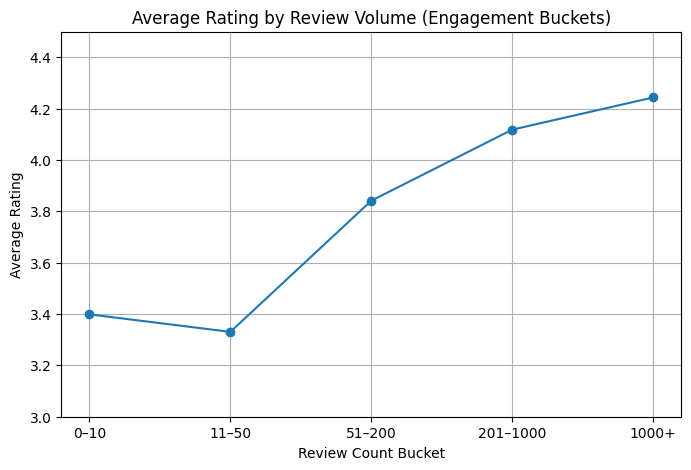

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(bucket_stats.index, bucket_stats["avg_rating"], marker="o")
plt.title("Average Rating by Review Volume (Engagement Buckets)")
plt.xlabel("Review Count Bucket")
plt.ylabel("Average Rating")
plt.ylim(3.0, 4.5)
plt.grid(True)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_8960\3066655868.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("photo_bucket")


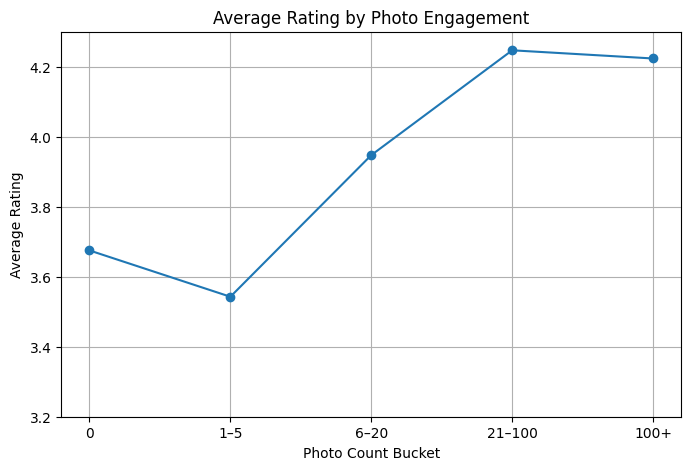

In [48]:
coffee_engagement["photo_bucket"] = pd.cut(
    coffee_engagement["photo_count"],
    bins=[0, 1, 5, 20, 100, 600],
    labels=["0", "1–5", "6–20", "21–100", "100+"]
)
photo_stats = (
    coffee_engagement
    .groupby("photo_bucket")
    .agg(avg_rating=("avg_rating", "mean"))
)

plt.figure(figsize=(8,5))
plt.plot(photo_stats.index, photo_stats["avg_rating"], marker="o")
plt.title("Average Rating by Photo Engagement")
plt.xlabel("Photo Count Bucket")
plt.ylabel("Average Rating")
plt.ylim(3.2, 4.3)
plt.grid(True)
plt.show()


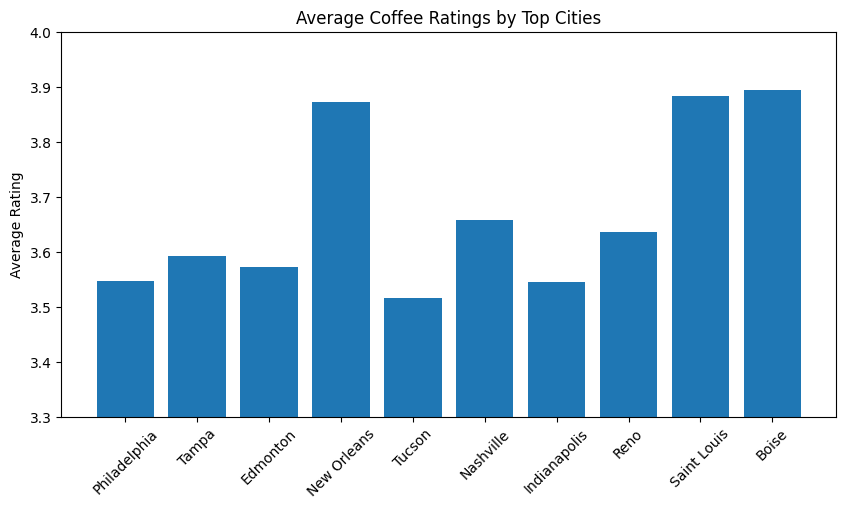

In [49]:
top_cities = coffee_city_stats.head(10)

plt.figure(figsize=(10,5))
plt.bar(top_cities.index, top_cities["avg_rating"])
plt.title("Average Coffee Ratings by Top Cities")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.ylim(3.3, 4.0)
plt.show()

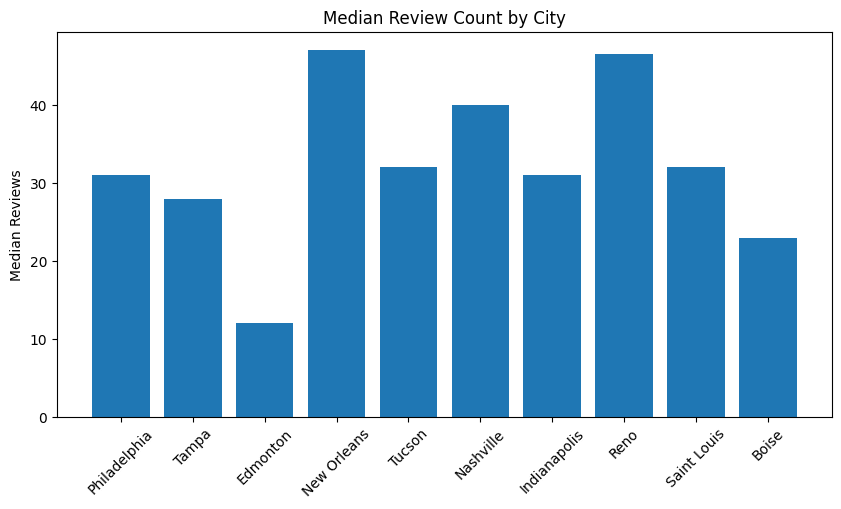

In [50]:
plt.figure(figsize=(10,5))
plt.bar(top_cities.index, top_cities["median_reviews"])
plt.title("Median Review Count by City")
plt.ylabel("Median Reviews")
plt.xticks(rotation=45)
plt.show()

In [51]:
# coffee_engagement already created earlier
# Columns: review_count, avg_rating, city, state

coffee_plot_df = coffee_engagement[
    ["review_count", "avg_rating"]
].copy()

In [52]:
import pandas as pd

coffee_plot_df["engagement_bucket"] = pd.qcut(
    coffee_plot_df["review_count"],
    q=5,
    labels=["Very Low", "Low", "Medium", "High", "Very High"]
)


C:\Users\hp\AppData\Local\Temp\ipykernel_8960\2427772768.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("engagement_bucket")


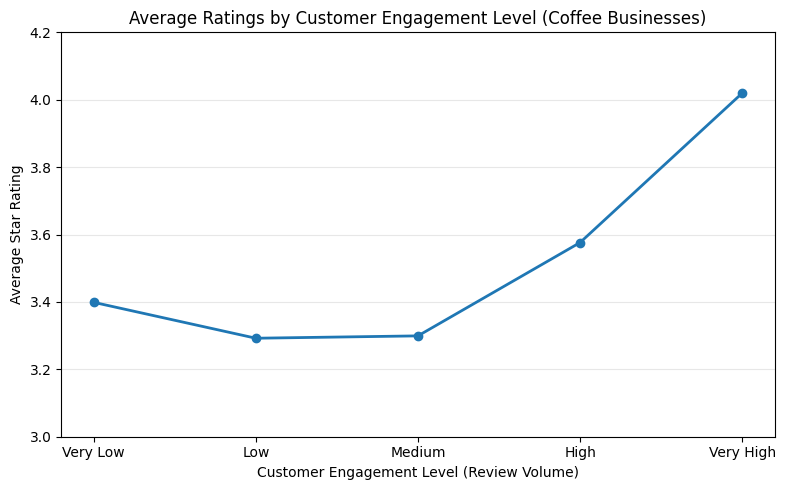

In [53]:
import matplotlib.pyplot as plt

bucket_stats = (
    coffee_plot_df
    .groupby("engagement_bucket")
    .agg(avg_rating=("avg_rating", "mean"))
)

plt.figure(figsize=(8,5))
plt.plot(
    bucket_stats.index,
    bucket_stats["avg_rating"],
    marker="o",
    linewidth=2
)

plt.title("Average Ratings by Customer Engagement Level (Coffee Businesses)")
plt.xlabel("Customer Engagement Level (Review Volume)")
plt.ylabel("Average Star Rating")
plt.ylim(3.0, 4.2)

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


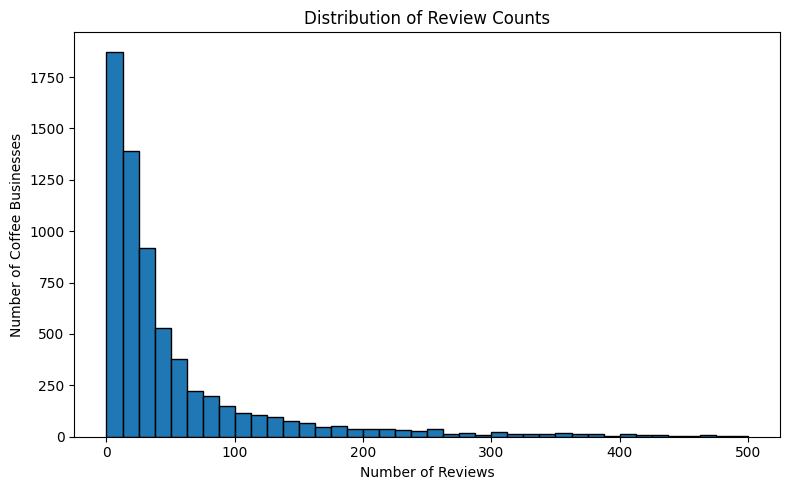

In [183]:
plt.figure(figsize=(8,5))

plt.hist(
    coffee_plot_df["review_count"],
    bins=40,
    range=(0, 500),
    edgecolor="black"
)

plt.title("Distribution of Review Counts")
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Coffee Businesses")

plt.tight_layout()
plt.show()


In [55]:
coffee_reviews.columns


Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

# Hypotheses 3 - Operating hours

In [16]:
coffee_businesses = coffee_df[
    coffee_df["business_id"].isin(coffee_ids)
].copy()

len(coffee_businesses)

6728

In [22]:
import ast

def parse_hours_object(x):
    if isinstance(x, dict):
        return x
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except:
            return None
    return None

In [24]:
coffee_businesses["hours_dict"] = coffee_businesses["hours"].apply(parse_hours_object)

In [41]:
coffee_businesses[["weekly_hours", "hours_consistency"]] = (
    coffee_businesses["hours_dict"]
    .apply(compute_hours_metrics)
)

In [42]:
coffee_businesses[["weekly_hours", "hours_consistency"]].describe()


,weekly_hours,hours_consistency
count,6728.000000,6253.000000
mean,59.772500,1.201245
std,40.614017,1.647784
min,0.000000,0.000000
25%,32.000000,0.000000
50%,60.000000,0.451754
75%,91.000000,1.878992
max,167.883333,10.887177


In [28]:
coffee_businesses["hours"].apply(type).value_counts().head()

hours
<class 'str'>    6728
Name: count, dtype: int64

In [29]:
coffee_businesses[
    coffee_businesses["weekly_hours"] > 0
][["hours_dict", "weekly_hours", "hours_consistency"]].head()

,hours_dict,weekly_hours,hours_consistency
3,"{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",94.0,0.494872
20,"{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",67.0,1.049781
46,"{'Monday': '11:0-1:0', 'Tuesday': '11:0-1:0', ...",82.0,3.614032
47,"{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",70.0,0.000000
53,"{'Monday': '0:0-0:0', 'Tuesday': '10:0-21:0', ...",59.0,3.658928


In [43]:
hours_features_df = coffee_businesses[
    ["business_id", "weekly_hours", "hours_consistency"]
].copy()

hours_features_df.head()

,business_id,weekly_hours,hours_consistency
3,MTSW4McQd7CbVtyjqoe9mw,94.0,0.494872
20,WKMJwqnfZKsAae75RMP6jA,67.0,1.049781
46,JX4tUpd09YFchLBuI43lGw,82.0,3.614032
47,lk9IwjZXqUMqqOhM774DtQ,70.0,0.000000
53,cVBxfMC4lp3DnocjYA3FHQ,59.0,3.658928


In [49]:
checkin_counts = (
    checkin_df
    .assign(
        checkins_count=lambda df: df["date"].fillna("").apply(
            lambda x: len(x.split(",")) if x != "" else 0
        )
    )
    [["business_id", "checkins_count"]]
)

checkin_counts.head()


,business_id,checkins_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26


In [51]:
coffee_hours_engagement = (
    coffee_df
    .merge(hours_features_df, on="business_id", how="left")
    .merge(checkin_counts, on="business_id", how="left")
)

In [52]:
coffee_hours_engagement = (
    coffee_df
    .merge(hours_features_df, on="business_id", how="left")
    .merge(checkin_counts, on="business_id", how="left")
)

coffee_hours_engagement[[
    "weekly_hours",
    "hours_consistency",
    "review_count",
    "stars",
    "checkins_count"
]].describe()

,weekly_hours,hours_consistency,review_count,stars,checkins_count
count,6728.000000,6253.000000,6728.000000,6728.000000,6665.000000
mean,59.772500,1.201245,63.990042,3.521254,191.069167
std,40.614017,1.647784,147.840137,1.011856,654.683967
min,0.000000,0.000000,5.000000,1.000000,1.000000
25%,32.000000,0.000000,11.000000,3.000000,20.000000
50%,60.000000,0.451754,25.000000,4.000000,58.000000
75%,91.000000,1.878992,59.000000,4.500000,177.000000
max,167.883333,10.887177,5721.000000,5.000000,40109.000000


In [54]:
corr_cols = [
    "weekly_hours",
    "hours_consistency",
    "review_count",
    "stars",
    "checkins_count"
]

corr_matrix = coffee_hours_engagement[corr_cols].corr(method="pearson")
corr_matrix

,weekly_hours,hours_consistency,review_count,stars,checkins_count
weekly_hours,1.000000,0.081411,0.006689,-0.167771,0.042186
hours_consistency,0.081411,1.000000,0.049725,0.155604,0.047461
review_count,0.006689,0.049725,1.000000,0.164618,0.667739
stars,-0.167771,0.155604,0.164618,1.000000,0.072818
checkins_count,0.042186,0.047461,0.667739,0.072818,1.000000


C:\Users\hp\AppData\Local\Temp\ipykernel_10740\340644391.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_checkins"] = np.log1p(df["checkins_count"])


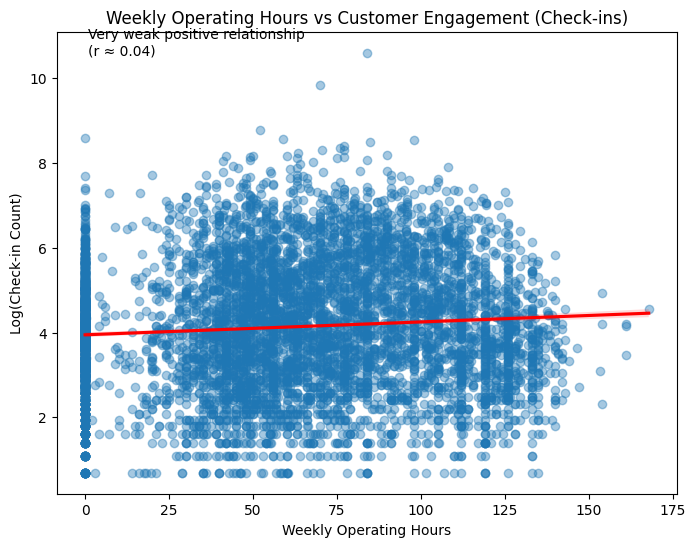

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = coffee_hours_engagement.dropna(subset=["weekly_hours", "checkins_count"])

df["log_checkins"] = np.log1p(df["checkins_count"])

plt.figure(figsize=(8,6))
sns.regplot(
    data=df,
    x="weekly_hours",
    y="log_checkins",
    scatter_kws={"alpha": 0.4},
    line_kws={"color": "red"}
)

plt.title("Weekly Operating Hours vs Customer Engagement (Check-ins)")
plt.xlabel("Weekly Operating Hours")
plt.ylabel("Log(Check-in Count)")
plt.annotate(
    "Very weak positive relationship\n(r ≈ 0.04)",
    xy=(0.05, 0.95),
    xycoords="axes fraction"
)
plt.show()

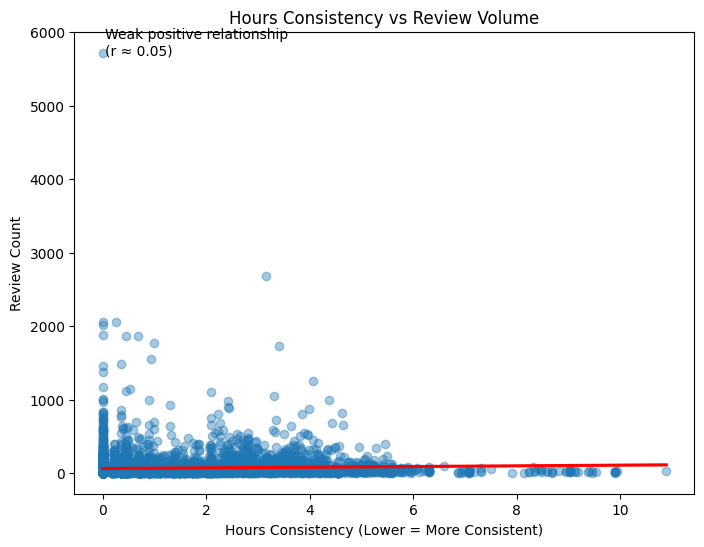

In [63]:
df2 = coffee_hours_engagement.dropna(subset=["hours_consistency", "review_count"])

plt.figure(figsize=(8,6))
sns.regplot(
    data=df2,
    x="hours_consistency",
    y="review_count",
    scatter_kws={"alpha": 0.4},
    line_kws={"color": "red"}
)

plt.title("Hours Consistency vs Review Volume")
plt.xlabel("Hours Consistency (Lower = More Consistent)")
plt.ylabel("Review Count")
plt.annotate(
    "Weak positive relationship\n(r ≈ 0.05)",
    xy=(0.05, 0.95),
    xycoords="axes fraction"
)
plt.show()

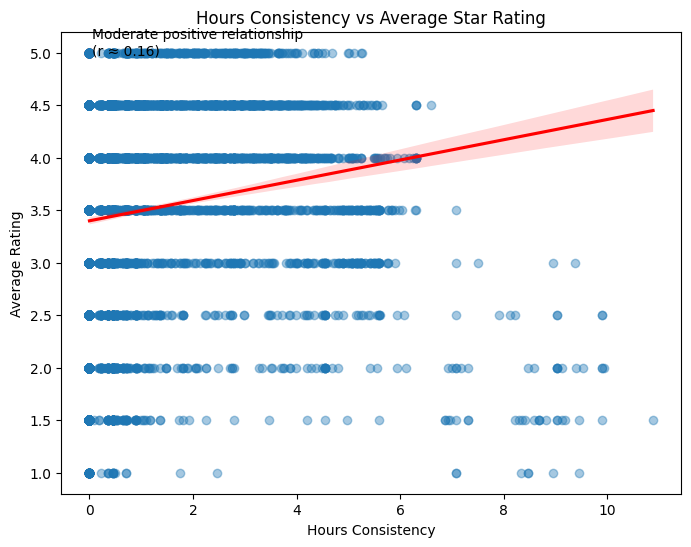

In [64]:
df3 = coffee_hours_engagement.dropna(subset=["hours_consistency", "stars"])

plt.figure(figsize=(8,6))
sns.regplot(
    data=df3,
    x="hours_consistency",
    y="stars",
    scatter_kws={"alpha": 0.4},
    line_kws={"color": "red"}
)

plt.title("Hours Consistency vs Average Star Rating")
plt.xlabel("Hours Consistency")
plt.ylabel("Average Rating")
plt.annotate(
    "Moderate positive relationship\n(r ≈ 0.16)",
    xy=(0.05, 0.95),
    xycoords="axes fraction"
)
plt.show()

In [66]:
top_checkins = (
    coffee_hours_engagement
    .sort_values("checkins_count", ascending=False)
    .head(10)[["business_id", "name", "city", "state", "checkins_count", "weekly_hours", "stars", "review_count"]]
)

top_checkins

,business_id,name,city,state,checkins_count,weekly_hours,stars,review_count
1457,FEXhWNCMkv22qG04E83Qjg,Café Du Monde,New Orleans,LA,40109.0,84.00,4.0,1880
6397,ytynqOUb3hjKeJfRj5Tshw,Reading Terminal Market,Philadelphia,PA,18615.0,70.00,4.5,5721
5655,Y2Pfil51rNvTd_lFHwzb_g,Cafe Beignet on Royal Street,New Orleans,LA,6459.0,52.00,4.0,2688
541,SwBhaxfQPbyhsi0QHUAN0A,Seminole Hard Rock Hotel & Casino Tampa,Tampa,FL,5394.0,0.00,2.5,739
3513,uvGfk8eirExWR-B9zsIN5Q,Indianapolis City Market,Indianapolis,IN,5280.0,59.00,4.0,227
104,8uF-bhJFgT4Tn6DTb27viA,District Donuts Sliders Brew,New Orleans,LA,5090.0,98.00,4.5,2062
6594,qQO7ErS_RAN4Vs1uX0L55Q,The Franklin Fountain,Philadelphia,PA,4894.0,84.75,4.0,2062
3691,tMtI6ECD6hwM-nFp2kXLKQ,Tea Do,Philadelphia,PA,4461.0,77.00,4.0,835
797,fCDMLD21ypv1XZ_EyafCkQ,Bodega,Saint Petersburg,FL,4202.0,76.00,4.5,1772
1528,VgAKmXE8B7J0I_O_R13UKQ,Santa Barbara Roasting Company,Santa Barbara,CA,4052.0,70.50,4.0,511


# Coffee Users

In [187]:
coffee_user_ids = (
    reviews_df.loc[
        reviews_df["business_id"].isin(coffee_ids),
        "user_id"
    ]
    .unique()
)

coffee_users = users_df[
    users_df["user_id"].isin(coffee_user_ids)
]
len(coffee_user_ids)
len(coffee_users)


259797

In [59]:
users_df["is_coffee_user"] = users_df["user_id"].isin(coffee_user_ids)

user_stats = users_df.groupby("is_coffee_user").agg(
    avg_reviews=("review_count", "mean"),
    avg_rating=("average_stars", "mean"),
    avg_fans=("fans", "mean"),
    user_count=("user_id", "count")
)

user_stats


,avg_reviews,avg_rating,avg_fans,user_count
is_coffee_user,,,,
False,18.291572,3.605876,0.985625,1728100
True,57.337113,3.794250,4.659342,259797


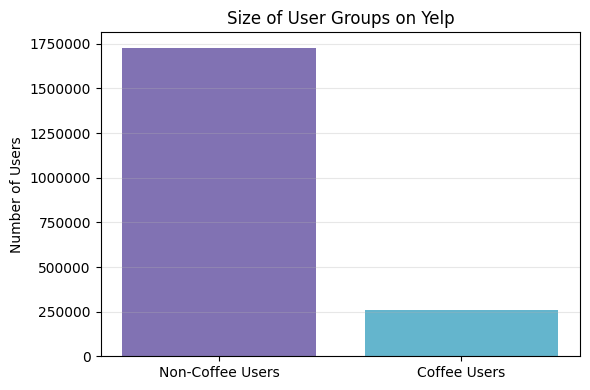

In [66]:
user_counts = user_stats["user_count"].values
labels = ["Non‑Coffee Users", "Coffee Users"]
plt.figure(figsize=(6,4))

plt.bar(labels, user_counts,
        color=["#8172B3", "#64B5CD"])

plt.ylabel("Number of Users")
plt.title("Size of User Groups on Yelp")
plt.ticklabel_format(style="plain", axis="y")
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()


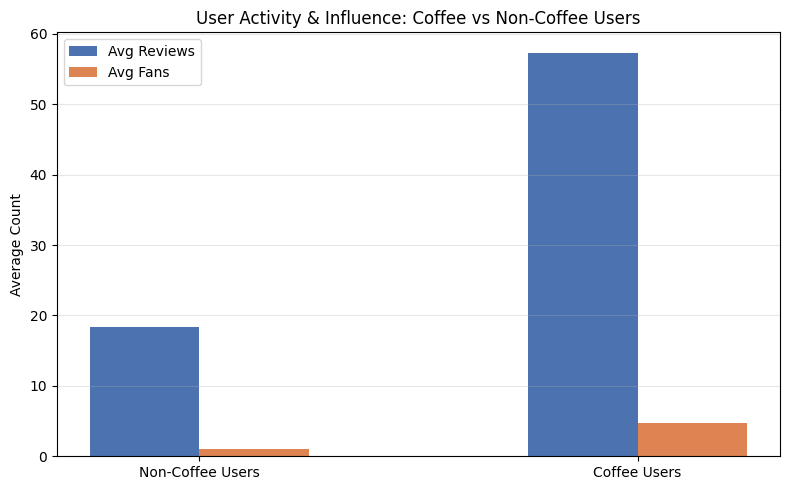

In [67]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["Non‑Coffee Users", "Coffee Users"]

avg_reviews = user_stats["avg_reviews"].values
avg_fans = user_stats["avg_fans"].values

x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(8,5))

plt.bar(x - width/2, avg_reviews, width,
        label="Avg Reviews",
        color="#4C72B0")

plt.bar(x + width/2, avg_fans, width,
        label="Avg Fans",
        color="#DD8452")

plt.xticks(x, labels)
plt.ylabel("Average Count")
plt.title("User Activity & Influence: Coffee vs Non‑Coffee Users")
plt.legend()
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()


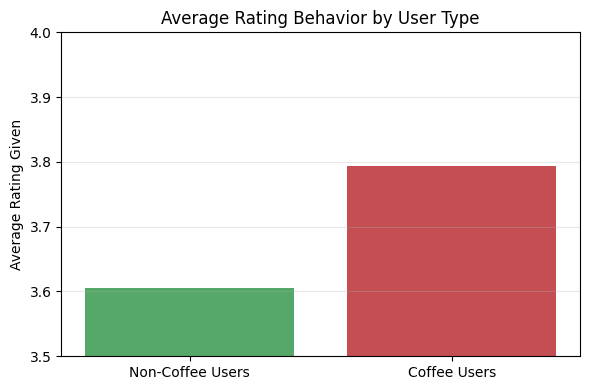

In [68]:
avg_rating = user_stats["avg_rating"].values

plt.figure(figsize=(6,4))

plt.bar(labels, avg_rating,
        color=["#55A868", "#C44E52"])

plt.ylabel("Average Rating Given")
plt.title("Average Rating Behavior by User Type")
plt.ylim(3.5, 4)   # short axis for readability
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()


In [69]:
coffee_df["attributes"].dropna().head(5)


3     {'RestaurantsDelivery': 'False', 'OutdoorSeati...
20    {'OutdoorSeating': 'False', 'Caters': 'True', ...
46    {'OutdoorSeating': 'False', 'BusinessParking':...
47    {'RestaurantsTakeOut': 'True', 'RestaurantsRes...
53    {'RestaurantsAttire': "'casual'", 'Restaurants...
Name: attributes, dtype: object

In [70]:
coffee_df["attributes"].apply(type).value_counts()


attributes
<class 'str'>    6728
Name: count, dtype: int64

In [71]:
# Creating a clean “attributes base table”
# Filters to only businesses that actually have attributes
coffee_attr_base = coffee_df.loc[
    coffee_df["attributes"].notna(),
    ["business_id","name", "attributes", "categories"]
].copy()

coffee_attr_base.head()

,business_id,name,attributes,categories
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
20,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,"{'OutdoorSeating': 'False', 'Caters': 'True', ...","Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re..."
46,JX4tUpd09YFchLBuI43lGw,Naked Cyber Cafe & Espresso Bar,"{'OutdoorSeating': 'False', 'BusinessParking':...","Arts & Entertainment, Music Venues, Internet S..."
47,lk9IwjZXqUMqqOhM774DtQ,Caviar & Bananas,"{'RestaurantsTakeOut': 'True', 'RestaurantsRes...","Coffee & Tea, Restaurants, Wine Bars, Bars, Ni..."
53,cVBxfMC4lp3DnocjYA3FHQ,Paws The Cat Cafe,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Coffee & Tea, Cafes, Pets, Restaurants, Pet Ad..."


In [72]:
len(coffee_attr_base)

6728

In [73]:
# Defining “top coffee businesses” (business logic)
top_coffee = coffee_df[
    (coffee_df["review_count"] >= 200) &
    (coffee_df["stars"] >= 4.0)
].sort_values("review_count", ascending=False)

# Displays key details for the top coffee businesses
top_coffee[[
    "name", "city", "state", "stars", "review_count", "categories", "attributes"
]].head(5)


,name,city,state,stars,review_count,categories,attributes
143157,Reading Terminal Market,Philadelphia,PA,4.5,5721,"Candy Stores, Shopping, Department Stores, Fas...","{'RestaurantsGoodForGroups': 'True', 'Restaura..."
126929,Cafe Beignet on Royal Street,New Orleans,LA,4.0,2688,"Cafes, Breakfast & Brunch, Food, Restaurants, ...","{'BusinessAcceptsCreditCards': 'True', 'Restau..."
147511,The Franklin Fountain,Philadelphia,PA,4.0,2062,"Ice Cream & Frozen Yogurt, Coffee & Tea, Food,...","{'BusinessParking': ""{'garage': False, 'street..."
1971,District Donuts Sliders Brew,New Orleans,LA,4.5,2062,"Food, Donuts, Burgers, American (Traditional),...","{'RestaurantsPriceRange2': '1', 'RestaurantsRe..."
23788,Willa Jean,New Orleans,LA,4.0,2010,"Bakeries, Breakfast & Brunch, Food, Restaurant...","{'BusinessParking': ""{'garage': False, 'street..."


In [74]:
# Extracting IDs for reuse (efficiency step)
top_coffee_ids = set(top_coffee["business_id"])
len(top_coffee_ids)

387

In [75]:
# Pulling attributes ONLY for top coffee businesses
top_coffee_attrs = coffee_df.loc[
    coffee_df["business_id"].isin(top_coffee_ids),
    ["business_id", "name", "attributes", "stars", "review_count", "categories"]
]

top_coffee_attrs.head()

,business_id,name,attributes,stars,review_count,categories
85,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': ""...",4.0,389,"Food, Restaurants, Salad, Coffee & Tea, Breakf..."
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...",4.5,593,"Ice Cream & Frozen Yogurt, Coffee & Tea, Resta..."
537,dIpTuL2T1L98GQGU17IeSw,The Bricks,"{'BusinessParking': ""{'garage': False, 'street...",4.0,548,"Bars, Breakfast & Brunch, Restaurants, America..."
691,-kY_HDP7IMvGl-kBIZVU4A,Dune Coffee Roasters - Anacapa,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",4.0,320,"Coffee & Tea, Coffee Roasteries, Food"
1118,k0AO8X3VzWe_F4lkMb0eSg,The Cubby Hole,"{'Ambience': ""{'romantic': False, 'intimate': ...",4.5,202,"Breakfast & Brunch, Coffee & Tea, Restaurants,..."


In [76]:
low_coffee = coffee_df[
    (coffee_df["review_count"] < 100) &
    (coffee_df["stars"] <= 3)
]

len(low_coffee)

2256

In [77]:
low_coffee[[
    "name",
    "city",
    "state",
    "stars",
    "review_count",
    "categories",
    "attributes"
]].head(5)



,name,city,state,stars,review_count,categories,attributes
82,Wawa,Philadelphia,PA,3.0,56,"Restaurants, Automotive, Delis, Gas Stations, ...","{'Alcohol': ""u'none'"", 'RestaurantsGoodForGrou..."
256,Cafe Con Leche,Tampa,FL,2.5,55,"Restaurants, Breakfast & Brunch, Coffee Roaste...","{'BusinessAcceptsCreditCards': 'True', 'Restau..."
361,McDonald's,Lansdale,PA,1.5,17,"Restaurants, Fast Food, Burgers, Food, Coffee ...","{'WiFi': ""u'free'"", 'GoodForKids': 'True', 'Bu..."
371,Reinette Café & Patisserie,Edmonton,AB,3.0,5,"Food, Coffee & Tea, Bakeries, Restaurants, Cafes","{'Ambience': ""{'touristy': False, 'hipster': F..."
460,McDonald's,Pennsville,NJ,2.0,20,"Food, Burgers, Restaurants, Coffee & Tea, Fast...","{'BusinessAcceptsCreditCards': 'True', 'GoodFo..."


In [78]:
low_coffee_ids = set(low_coffee["business_id"])
len(low_coffee_ids)


2256

In [79]:
low_coffee_attrs = coffee_df.loc[
    coffee_df["business_id"].isin(low_coffee_ids),
    ["business_id", "name", "attributes", "stars", "review_count", "categories"]
].copy()

low_coffee_attrs.head()


,business_id,name,attributes,stars,review_count,categories
82,ppFCk9aQkM338Rgwpl2F5A,Wawa,"{'Alcohol': ""u'none'"", 'RestaurantsGoodForGrou...",3.0,56,"Restaurants, Automotive, Delis, Gas Stations, ..."
256,py5aKmlTB2NarfsfcOpHOQ,Cafe Con Leche,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",2.5,55,"Restaurants, Breakfast & Brunch, Coffee Roaste..."
361,aNXw3PkXVt8ANwLyCfcmpg,McDonald's,"{'WiFi': ""u'free'"", 'GoodForKids': 'True', 'Bu...",1.5,17,"Restaurants, Fast Food, Burgers, Food, Coffee ..."
371,JwBTq6IOFH97b9Hr6RT7pw,Reinette Café & Patisserie,"{'Ambience': ""{'touristy': False, 'hipster': F...",3.0,5,"Food, Coffee & Tea, Bakeries, Restaurants, Cafes"
460,gb7JjRJtzWDsIWpJihZhBQ,McDonald's,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...",2.0,20,"Food, Burgers, Restaurants, Coffee & Tea, Fast..."


In [80]:
coffee_df.assign(
    performance_group = coffee_df["business_id"].apply(
        lambda x: "Top" if x in top_coffee_ids
        else "Low" if x in low_coffee_ids
        else "Mid"
    )
).groupby("performance_group").agg(
    avg_rating=("stars", "mean"),
    median_reviews=("review_count", "median"),
    business_count=("business_id", "count")
)


,avg_rating,median_reviews,business_count
performance_group,,,
Low,2.306959,17.0,2256
Mid,4.121420,29.0,4085
Top,4.264858,318.0,387


In [81]:
import ast

def safe_parse(x):
    if pd.isna(x):
        return {}
    try:
        parsed = ast.literal_eval(x)
        return parsed if isinstance(parsed, dict) else {}
    except:
        return {}


In [82]:
coffee_df = coffee_df.copy()

coffee_df["attributes_dict"] = coffee_df["attributes"].apply(safe_parse)

In [98]:
from collections import Counter

all_attrs = Counter()

for d in coffee_df["attributes_dict"]:
    all_attrs.update(d.keys())

In [188]:
attr_freq_all = (
    pd.Series(all_attrs)
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={"index": "attribute", 0: "count"})
)

attr_freq_all.head(10)

,attribute,count
0,BusinessParking,6047
1,RestaurantsTakeOut,5935
2,WiFi,5816
3,BusinessAcceptsCreditCards,5810
4,RestaurantsPriceRange2,5707
5,OutdoorSeating,5415
6,BikeParking,4937
7,RestaurantsDelivery,4927
8,Caters,3884
9,GoodForKids,2838


In [190]:
top_coffee = coffee_df[
    (coffee_df["review_count"] >= 200) &
    (coffee_df["stars"] >= 4.0)
]

top_attrs = Counter()
for d in top_coffee["attributes_dict"]:
    top_attrs.update(d.keys())

top_attr_freq = (
    pd.Series(top_attrs)
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={"index": "attribute", 0: "top_count"})
)
top_attr_freq.head(15)

,attribute,top_count
0,BusinessParking,387
1,RestaurantsPriceRange2,387
2,BusinessAcceptsCreditCards,386
3,RestaurantsTakeOut,384
4,WiFi,384
5,BikeParking,384
6,OutdoorSeating,383
7,Caters,378
8,RestaurantsDelivery,375
9,NoiseLevel,362


In [101]:
low_coffee = coffee_df[
    (coffee_df["review_count"] < 100) &
    (coffee_df["stars"] <= 3.0)
]

low_attrs = Counter()
for d in low_coffee["attributes_dict"]:
    low_attrs.update(d.keys())

low_attr_freq = (
    pd.Series(low_attrs)
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={"index": "attribute", 0: "low_count"})
)
low_attr_freq.head(15)

,attribute,low_count
0,RestaurantsTakeOut,2063
1,RestaurantsPriceRange2,2052
2,BusinessAcceptsCreditCards,1949
3,BusinessParking,1936
4,WiFi,1883
5,RestaurantsDelivery,1764
6,OutdoorSeating,1672
7,BikeParking,1562
8,DriveThru,1158
9,Caters,1028


In [105]:
n_top = len(top_coffee)
n_low = len(low_coffee)

In [108]:
from collections import Counter

# TOP coffee
top_attrs = Counter()
for d in top_coffee["attributes_dict"]:
    if isinstance(d, dict):
        top_attrs.update(d.keys())

top_attr_freq = (
    pd.Series(top_attrs)
    .reset_index()
    .rename(columns={"index": "attribute", 0: "top_count"})
)

# LOW coffee
low_attrs = Counter()
for d in low_coffee["attributes_dict"]:
    if isinstance(d, dict):
        low_attrs.update(d.keys())

low_attr_freq = (
    pd.Series(low_attrs)
    .reset_index()
    .rename(columns={"index": "attribute", 0: "low_count"})
)
attr_compare = (
    top_attr_freq
    .merge(low_attr_freq, on="attribute", how="outer")
    .fillna(0)
)


In [109]:
attr_compare["top_pct"] = attr_compare["top_count"] / n_top
attr_compare["low_pct"] = attr_compare["low_count"] / n_low

In [110]:
attr_compare["pct_difference"] = (
    attr_compare["top_pct"] - attr_compare["low_pct"]
)

attr_compare.sort_values("pct_difference", ascending=False).head(15)

,attribute,top_count,low_count,top_pct,low_pct,pct_difference
14,DogsAllowed,276.0,102.0,0.713178,0.045213,0.667966
23,NoiseLevel,362.0,675.0,0.935401,0.299202,0.636198
20,HappyHour,222.0,23.0,0.573643,0.010195,0.563448
1,Alcohol,332.0,727.0,0.857881,0.322252,0.535629
11,Caters,378.0,1028.0,0.976744,0.455674,0.521070
18,GoodForMeal,292.0,577.0,0.754522,0.255762,0.498760
34,WheelchairAccessible,211.0,144.0,0.545220,0.063830,0.481390
17,GoodForKids,344.0,949.0,0.888889,0.420656,0.468233
31,RestaurantsTableService,213.0,202.0,0.550388,0.089539,0.460849
21,HasTV,303.0,874.0,0.782946,0.387411,0.395534


In [111]:
attr_compare.sort_values("pct_difference", ascending=False).head(10)

,attribute,top_count,low_count,top_pct,low_pct,pct_difference
14,DogsAllowed,276.0,102.0,0.713178,0.045213,0.667966
23,NoiseLevel,362.0,675.0,0.935401,0.299202,0.636198
20,HappyHour,222.0,23.0,0.573643,0.010195,0.563448
1,Alcohol,332.0,727.0,0.857881,0.322252,0.535629
11,Caters,378.0,1028.0,0.976744,0.455674,0.521070
18,GoodForMeal,292.0,577.0,0.754522,0.255762,0.498760
34,WheelchairAccessible,211.0,144.0,0.545220,0.063830,0.481390
17,GoodForKids,344.0,949.0,0.888889,0.420656,0.468233
31,RestaurantsTableService,213.0,202.0,0.550388,0.089539,0.460849
21,HasTV,303.0,874.0,0.782946,0.387411,0.395534


In [113]:
plot_df = (
    attr_compare
    .sort_values("pct_difference", ascending=False)
    .head(10)
)

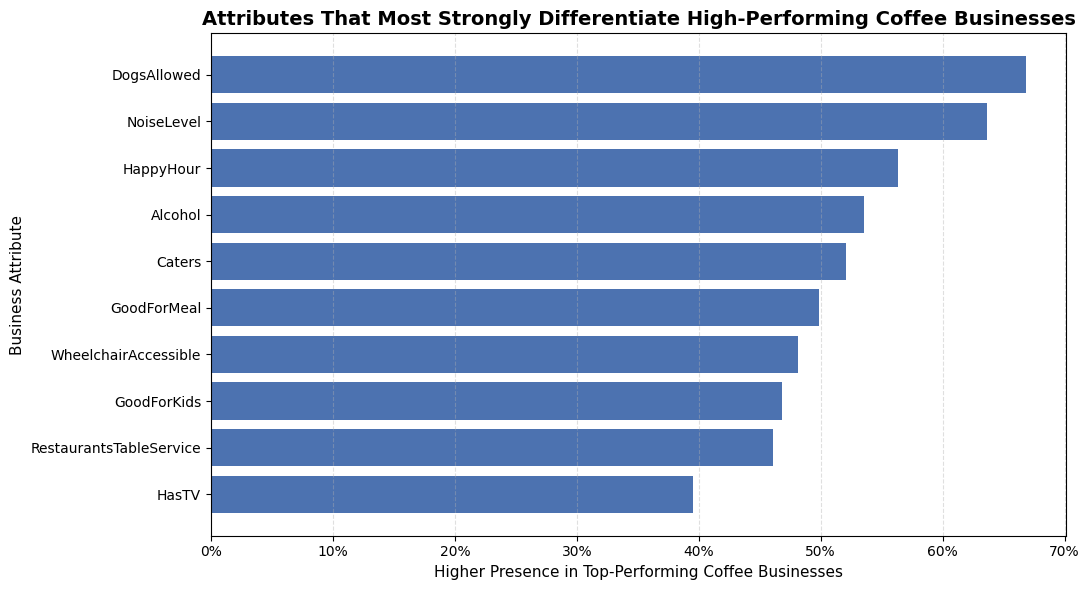

In [114]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

plot_df = (
    attr_compare
    .sort_values("pct_difference", ascending=False)
    .head(10)
)

plt.figure(figsize=(11, 6))

plt.barh(
    plot_df["attribute"],
    plot_df["pct_difference"],
    color="#4C72B0"
)

plt.gca().xaxis.set_major_formatter(PercentFormatter(1.0))
plt.xlabel("Higher Presence in Top‑Performing Coffee Businesses", fontsize=11)
plt.ylabel("Business Attribute", fontsize=11)

plt.title(
    "Attributes That Most Strongly Differentiate High‑Performing Coffee Businesses",
    fontsize=14,
    weight="bold"
)

plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_8960\662023440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseline_df["top_pct"] = baseline_df["top_count"] / len(top_coffee)


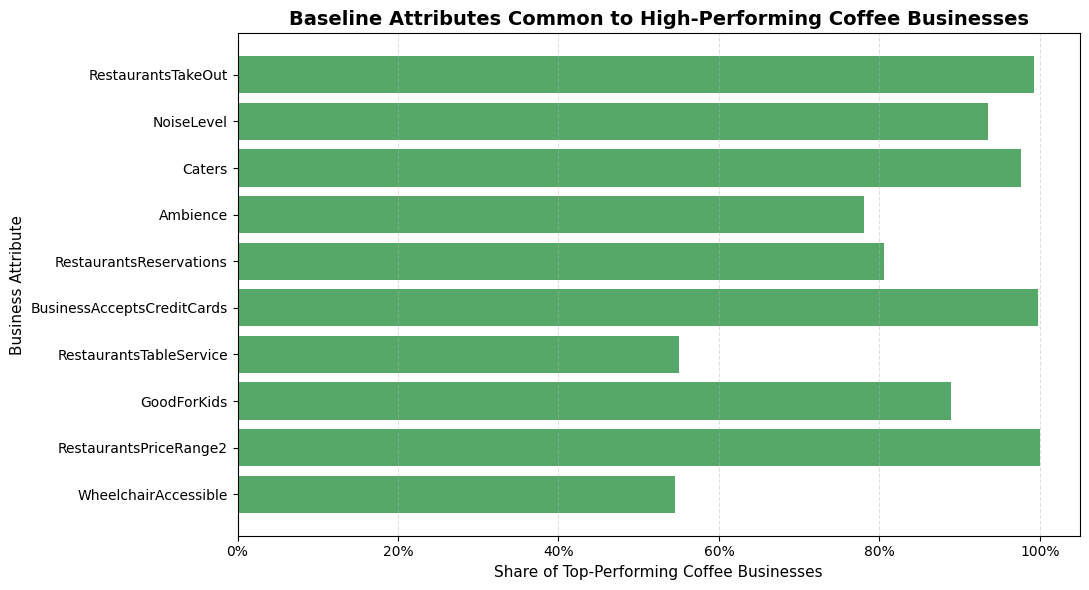

In [115]:
baseline_df = top_attr_freq.head(10)
baseline_df["top_pct"] = baseline_df["top_count"] / len(top_coffee)

plt.figure(figsize=(11, 6))

plt.barh(
    baseline_df["attribute"],
    baseline_df["top_pct"],
    color="#55A868"
)

plt.gca().xaxis.set_major_formatter(PercentFormatter(1.0))
plt.xlabel("Share of Top‑Performing Coffee Businesses", fontsize=11)
plt.ylabel("Business Attribute", fontsize=11)

plt.title(
    "Baseline Attributes Common to High‑Performing Coffee Businesses",
    fontsize=14,
    weight="bold"
)

plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()



C:\Users\hp\AppData\Local\Temp\ipykernel_8960\3429138042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_baseline_df["low_pct"] = low_baseline_df["low_count"] / len(low_coffee)


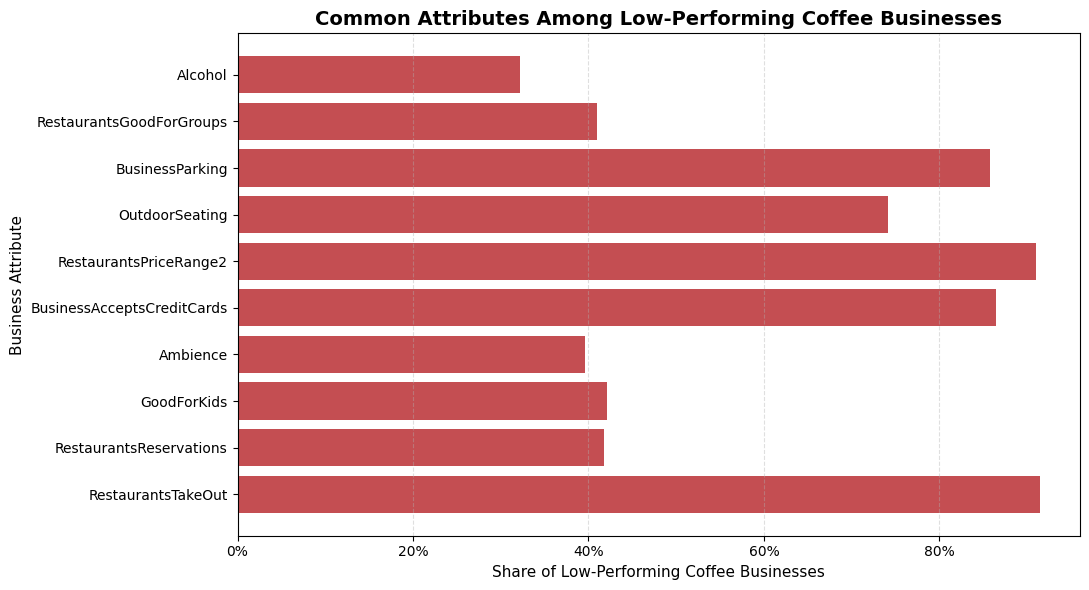

In [116]:
low_baseline_df = low_attr_freq.head(10)
low_baseline_df["low_pct"] = low_baseline_df["low_count"] / len(low_coffee)

plt.figure(figsize=(11, 6))

plt.barh(
    low_baseline_df["attribute"],
    low_baseline_df["low_pct"],
    color="#C44E52"
)

plt.gca().xaxis.set_major_formatter(PercentFormatter(1.0))
plt.xlabel("Share of Low‑Performing Coffee Businesses", fontsize=11)
plt.ylabel("Business Attribute", fontsize=11)

plt.title(
    "Common Attributes Among Low‑Performing Coffee Businesses",
    fontsize=14,
    weight="bold"
)

plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()

In [117]:
# Here i also wanna check coffee business hours, top coffee business hours etc - for ideal operating hours for coffeeking
# ideal location within the ideal top 5 cities and states


# Beyond Descriptive Ananlysis - A3

In [118]:
coffee_engagement_summary

,review_count,avg_rating,checkin_count,tip_count,photo_count
business_id,,,,,
-0epFLgYq2C1Jo_W4FOBKw,18,4.222222,1.0,1.0,1.0
-0gRYq5UjMtZbELj0KHxzA,133,3.593985,1.0,26.0,2.0
-0iIxySkp97WNlwK66OGWg,233,3.721030,1.0,28.0,2.0
-2BDt9OdGiBONysWCdKgNg,17,3.000000,1.0,10.0,6.0
-2dvQxx3cYXd5XmFdDDsDA,27,2.370370,1.0,1.0,0.0
...,...,...,...,...,...
zwizQO8vSXZBcVO-Nb_cUA,7,4.142857,1.0,5.0,0.0
zxuVnNVAUm16Sro0dS_lmg,257,4.116732,1.0,18.0,24.0
zyMkbavgHASQtqVwaock9A,21,3.809524,1.0,6.0,0.0


In [119]:
corr_cols = [
    "review_count",
    "avg_rating",
    "tip_count",
    "photo_count",
    "checkin_count"
]

corr_matrix = coffee_engagement_summary[corr_cols].corr(method="pearson")
corr_matrix

,review_count,avg_rating,tip_count,photo_count,checkin_count
review_count,1.000000,0.169838,0.643494,0.569152,0.036508
avg_rating,0.169838,1.000000,0.091363,0.140112,-0.009301
tip_count,0.643494,0.091363,1.000000,0.735150,0.026925
photo_count,0.569152,0.140112,0.735150,1.000000,0.028576
checkin_count,0.036508,-0.009301,0.026925,0.028576,1.000000


In [120]:
corr_matrix.loc["review_count", "photo_count"]

np.float64(0.5691522906780621)

In [121]:
corr_matrix.loc["review_count", "tip_count"]

np.float64(0.6434935405037948)

In [122]:
corr_matrix.loc["avg_rating"]
# High engagement does not necessarily imply higher ratings, suggesting that popularity and perceived quality are related but distinct dimensions.

review_count     0.169838
avg_rating       1.000000
tip_count        0.091363
photo_count      0.140112
checkin_count   -0.009301
Name: avg_rating, dtype: float64

In [123]:
from sklearn.linear_model import LinearRegression

X = coffee_engagement_summary[["photo_count", "tip_count"]]
y = coffee_engagement_summary["review_count"]
model = LinearRegression()
model.fit(X, y)



,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [124]:
coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": model.coef_
})

coef_df

,feature,coefficient
0,photo_count,3.207856
1,tip_count,1.897749


In [125]:
model.score(X, y)

0.4341749091942011

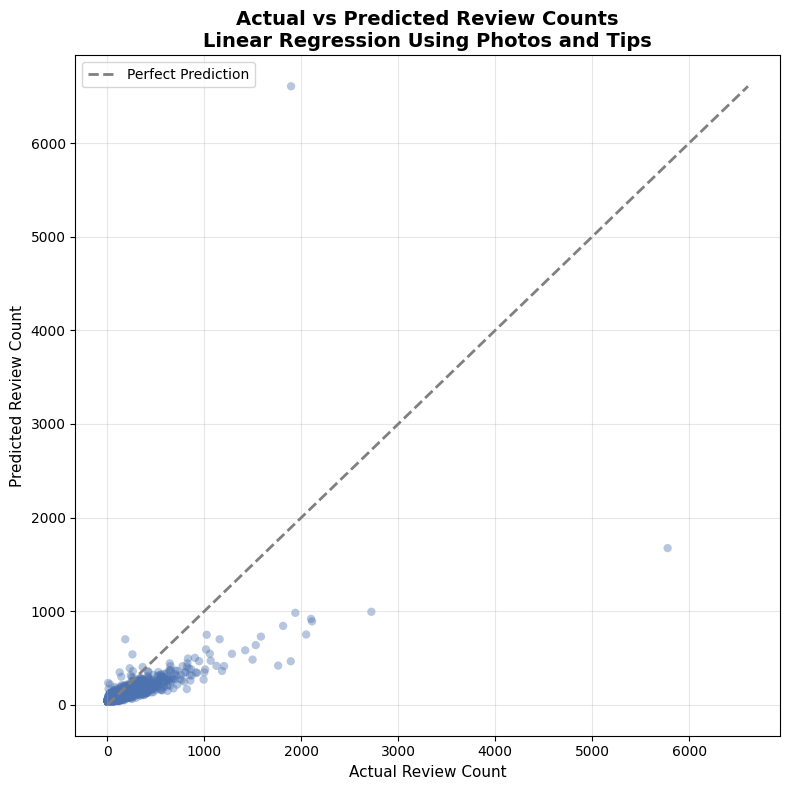

In [126]:
import matplotlib.pyplot as plt

# Generate predictions
y_pred = model.predict(X)

plt.figure(figsize=(8, 8))

plt.scatter(
    y,
    y_pred,
    alpha=0.4,
    color="#4C72B0",
    edgecolor="none"
)

# Perfect prediction line
max_val = max(y.max(), y_pred.max())
plt.plot(
    [0, max_val],
    [0, max_val],
    linestyle="--",
    color="gray",
    linewidth=2,
    label="Perfect Prediction"
)

plt.xlabel("Actual Review Count", fontsize=11)
plt.ylabel("Predicted Review Count", fontsize=11)

plt.title(
    "Actual vs Predicted Review Counts\nLinear Regression Using Photos and Tips",
    fontsize=14,
    weight="bold"
)

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [127]:
coffee_review_text = coffee_reviews["text"].dropna()
coffee_review_text.head()

0     If you decide to eat here, just be aware it is...
11    Locals recommended Milktooth, and it's an amaz...
19    My absolute favorite cafe in the city. Their b...
32    Great staff always helps and always nice. Alwa...
35    What a great addition to the Funk Zone!  Grab ...
Name: text, dtype: object

In [128]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

# Add custom stopwords (similar to video)
custom_stopwords = {
    "amp", "…", "’", "'", "``", "''"
}

stop_words = stop_words.union(custom_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [129]:
def tokenize_and_clean(text):
    return [
        word
        for word in text.lower().split()
        if word.isalpha() and word not in stop_words
    ]

In [130]:
tokens = coffee_review_text.apply(tokenize_and_clean)

# Flatten into one large corpus (all reviews combined)
all_words = [word for sublist in tokens for word in sublist]

In [131]:
from collections import Counter

word_counts = Counter(all_words)

# Convert to DataFrame
word_freq_df = (
    pd.DataFrame(word_counts.items(), columns=["word", "count"])
    .sort_values("count", ascending=False)
)

word_freq_df.head(20)

,word,count
104,coffee,205302
171,place,182044
67,great,145454
15,food,132672
10,like,130787
54,good,124510
163,get,123042
183,one,117005
53,really,96720
172,go,92456


In [132]:
top_coffee_ids = set(
    coffee_df[
        (coffee_df["review_count"] >= 200) &
        (coffee_df["stars"] >= 4.0)
    ]["business_id"]
)

low_coffee_ids = set(
    coffee_df[
        (coffee_df["review_count"] < 100) &
        (coffee_df["stars"] <= 3.0)
    ]["business_id"]
)

In [133]:
top_reviews = coffee_reviews[
    coffee_reviews["business_id"].isin(top_coffee_ids)
]["text"].dropna()

low_reviews = coffee_reviews[
    coffee_reviews["business_id"].isin(low_coffee_ids)
]["text"].dropna()

In [134]:
top_words = Counter(
    word
    for text in top_reviews
    for word in tokenize_and_clean(text)
)

low_words = Counter(
    word
    for text in low_reviews
    for word in tokenize_and_clean(text)
)

top_word_df = (
    pd.DataFrame(top_words.items(), columns=["words for top coffee", "count"])
    .sort_values("count", ascending=False)
)

low_word_df = (
    pd.DataFrame(low_words.items(), columns=["words for low perf coffee", "count"])
    .sort_values("count", ascending=False)
)

top_word_df.head(10), low_word_df.head(10)

(    words for top coffee  count
 82                 place  79913
 61                coffee  72963
 36                 great  63735
 273                 food  61944
 22                  good  52870
 361                 like  49789
 74                   get  45151
 98                   one  44581
 21                really  40555
 317                 also  37600,
     words for low perf coffee  count
 166                       get  20961
 100                     order  18423
 27                        one  18211
 103                    coffee  16376
 105                      like  16014
 20                       food  14330
 24                         go  14040
 78                       time  13917
 3                       drive  12845
 121                     place  12303)

In [135]:
# Row based TF-IDF (Features not just words)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=20
)

tfidf_matrix = vectorizer.fit_transform(top_reviews)

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=vectorizer.get_feature_names_out()
)
tfidf_df.head(5)

# Column based TF-IDF
tfidf_df.mean().sort_values(ascending=False)


place        0.157799
coffee       0.152795
food         0.141997
great        0.141421
good         0.137142
delicious    0.095075
just         0.091923
like         0.091219
service      0.089293
breakfast    0.083954
time         0.083506
love         0.078229
best         0.076897
really       0.076379
friendly     0.069946
ve           0.066884
try          0.065835
got          0.065518
nice         0.065393
little       0.062469
dtype: float64

In [136]:
# TF‑IDF Feature Presence (COUNT‑BASED, NOT WEIGHTED)

# TF-IDF for top coffee
vectorizer_top = TfidfVectorizer(
    stop_words="english",
    max_features=20
)

tfidf_top = vectorizer_top.fit_transform(top_reviews)

# Convert to binary presence (1 if word appears in review)
tfidf_top_binary = (tfidf_top > 0).astype(int)

top_feature_counts = pd.Series(
    tfidf_top_binary.sum(axis=0).A1,
    index=vectorizer_top.get_feature_names_out()
).sort_values(ascending=False)

top_feature_counts 

place        73285
food         61013
good         59997
great        59258
coffee       56203
just         39544
like         38538
delicious    37889
service      37770
time         34636
really       31578
breakfast    30109
best         29004
love         28916
friendly     28333
ve           26415
try          26332
nice         25619
little       24911
got          24639
dtype: int64

In [137]:
vectorizer_low = TfidfVectorizer(
    stop_words="english",
    max_features=20
)

tfidf_low = vectorizer_low.fit_transform(low_reviews)

tfidf_low_binary = (tfidf_low > 0).astype(int)

low_feature_counts = pd.Series(
    tfidf_low_binary.sum(axis=0).A1,
    index=vectorizer_low.get_feature_names_out()
).sort_values(ascending=False)

low_feature_counts


order        15576
service      14854
just         13932
time         13750
food         13069
coffee       12959
like         12342
drive        11997
location     11706
place        11604
good         10125
don           9714
ve            8622
starbucks     8479
staff         8433
got           8170
ordered       7867
people        7559
minutes       7254
drink         5679
dtype: int64

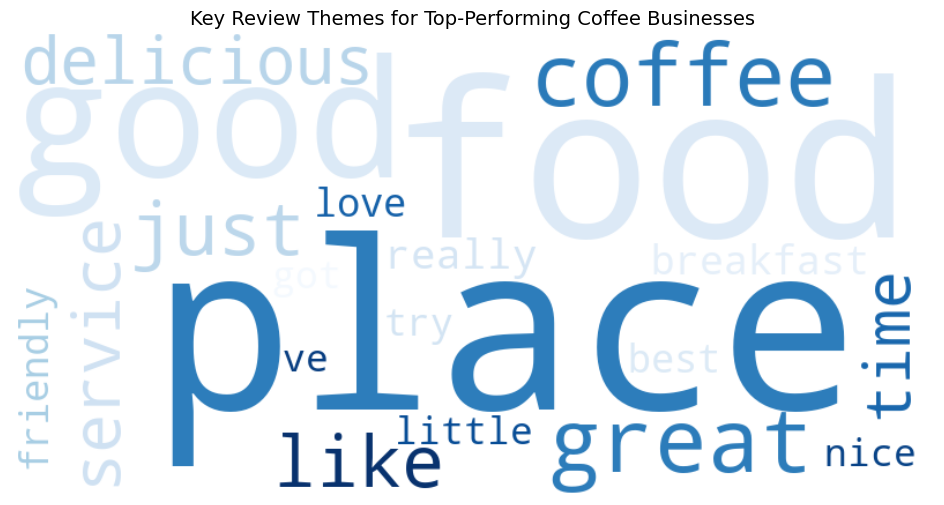

In [138]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc_top = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Blues"
).generate_from_frequencies(top_feature_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wc_top, interpolation="bilinear")
plt.axis("off")
plt.title("Key Review Themes for Top-Performing Coffee Businesses", fontsize=14)
plt.show()

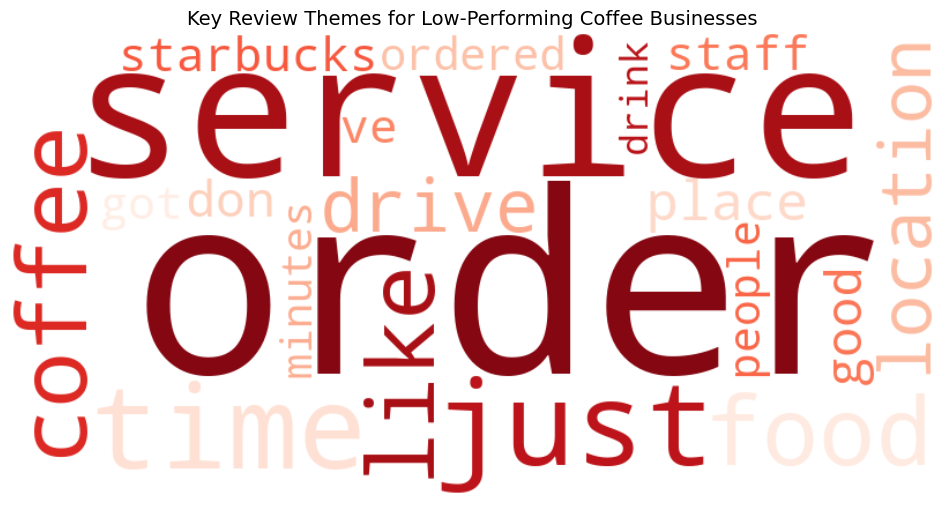

In [139]:
wc_low = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Reds"
).generate_from_frequencies(low_feature_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wc_low, interpolation="bilinear")
plt.axis("off")
plt.title("Key Review Themes for Low-Performing Coffee Businesses", fontsize=14)
plt.show()

In [140]:
# Multi‑Word Phrases (2–3 Words) 

vectorizer_top_bi = TfidfVectorizer(
    stop_words="english",
    ngram_range=(2, 2),   # BIGRAMS
    max_features=20
)

tfidf_top_bi = vectorizer_top_bi.fit_transform(top_reviews)

# Count presence across reviews
top_bi_counts = pd.Series(
    (tfidf_top_bi > 0).sum(axis=0).A1,
    index=vectorizer_top_bi.get_feature_names_out()
).sort_values(ascending=False)

top_bi_counts

coffee shop         7807
ice cream           6805
great place         6221
highly recommend    6157
really good         5695
love place          5425
staff friendly      4943
french toast        4865
new orleans         4608
great food          4326
food good           3913
great coffee        3900
customer service    3853
pretty good         3614
friendly staff      3566
food great          3562
service great       3497
great service       3388
gluten free         2759
fried chicken       2460
dtype: int64

In [141]:
vectorizer_top_tri = TfidfVectorizer(
    stop_words="english",
    ngram_range=(3, 3),   # TRIGRAMS
    max_features=15
)

tfidf_top_tri = vectorizer_top_tri.fit_transform(top_reviews)

top_tri_counts = pd.Series(
    (tfidf_top_tri > 0).sum(axis=0).A1,
    index=vectorizer_top_tri.get_feature_names_out()
).sort_values(ascending=False)

top_tri_counts

cafe du monde              1728
staff super friendly       1046
cafe au lait                971
reading terminal market     862
highly recommend place      725
love love love              659
little coffee shop          632
great food great            626
food great service          590
stuffed french toast        529
indoor outdoor seating      527
favorite coffee shop        516
great customer service      513
chocolate chip cookie       500
gooey butter cake           404
dtype: int64

In [142]:
vectorizer_low_bi = TfidfVectorizer(
    stop_words="english",
    ngram_range=(2, 2),
    max_features=20
)

tfidf_low_bi = vectorizer_low_bi.fit_transform(low_reviews)

low_bi_counts = pd.Series(
    (tfidf_low_bi > 0).sum(axis=0).A1,
    index=vectorizer_low_bi.get_feature_names_out()
).sort_values(ascending=False)

low_bi_counts

customer service    4406
dunkin donuts       2018
fast food           1756
don know            1451
iced coffee         1399
10 minutes          1342
20 minutes          1246
staff friendly      1216
parking lot         1209
15 minutes          1192
order wrong         1131
ice cream            899
went drive           856
order right          811
drive line           798
30 minutes           764
make sure            760
coffee shop          727
cream cheese         681
egg cheese           639
dtype: int64

In [143]:
vectorizer_low_tri = TfidfVectorizer(
    stop_words="english",
    ngram_range=(3, 3),
    max_features=20
)

tfidf_low_tri = vectorizer_low_tri.fit_transform(low_reviews)

low_tri_counts = pd.Series(
    (tfidf_low_tri > 0).sum(axis=0).A1,
    index=vectorizer_low_tri.get_feature_names_out()
).sort_values(ascending=False)

low_tri_counts

worst customer service       263
great customer service       261
ice cream machine            256
horrible customer service    255
bacon egg cheese             242
poor customer service        237
fast food restaurant         225
got order wrong              214
good customer service        211
bagel cream cheese           196
waited 20 minutes            195
worst dunkin donuts          191
terrible customer service    191
waited 10 minutes            191
waited 15 minutes            187
open 24 hours                182
worst mcdonald ve            178
customer service skills      174
don waste time               173
sausage egg cheese           153
dtype: int64

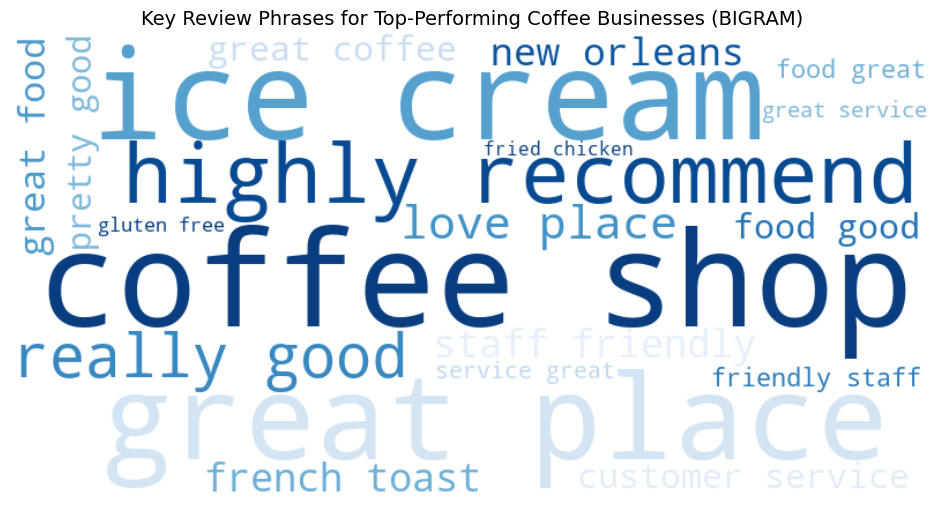

In [191]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc_top_bi = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Blues"
).generate_from_frequencies(top_bi_counts)

plt.figure(figsize=(12,6))
plt.imshow(wc_top_bi, interpolation="bilinear")
plt.axis("off")
plt.title("Key Review Phrases for Top-Performing Coffee Businesses (BIGRAM)", fontsize=14)
plt.show()

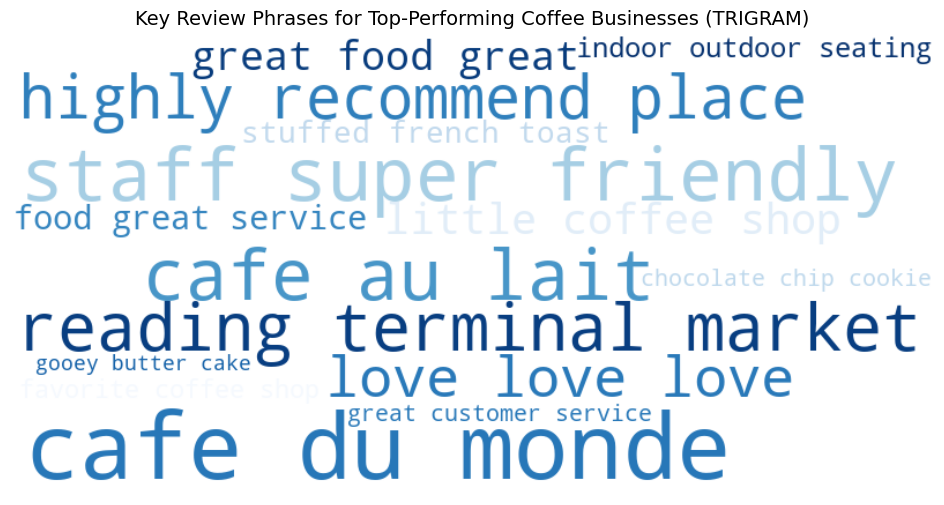

In [195]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc_top_tri = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Blues"
).generate_from_frequencies(top_tri_counts)

plt.figure(figsize=(12,6))
plt.imshow(wc_top_tri, interpolation="bilinear")
plt.axis("off")
plt.title("Key Review Phrases for Top-Performing Coffee Businesses (TRIGRAM)", fontsize=14)
plt.show()


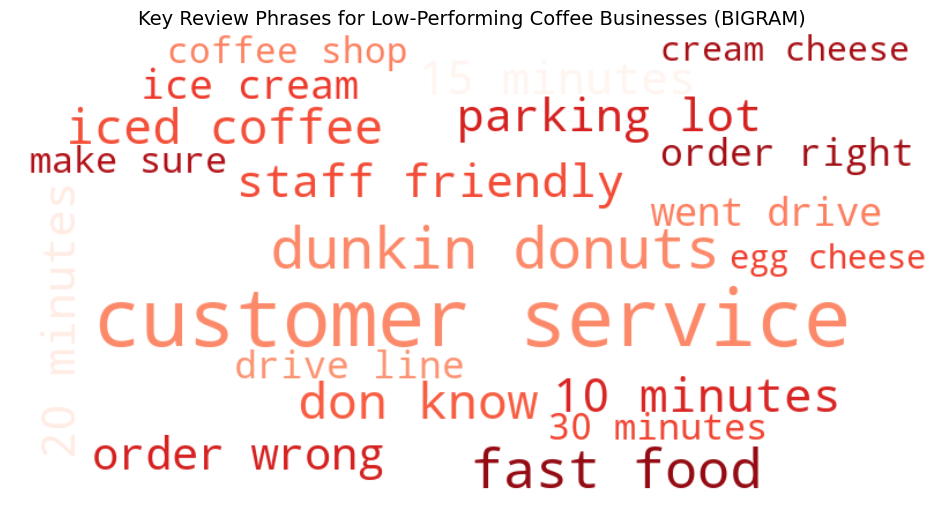

In [197]:
wc_low_bi = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Reds"
).generate_from_frequencies(low_bi_counts)

plt.figure(figsize=(12,6))
plt.imshow(wc_low_bi, interpolation="bilinear")
plt.axis("off")
plt.title("Key Review Phrases for Low-Performing Coffee Businesses (BIGRAM)", fontsize=14)
plt.show()


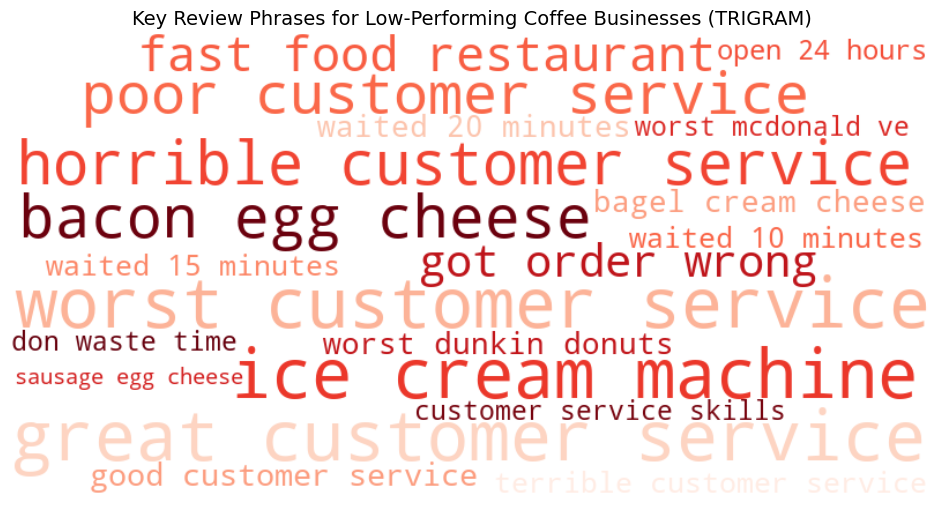

In [198]:
wc_low_tri = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Reds"
).generate_from_frequencies(low_tri_counts)

plt.figure(figsize=(12,6))
plt.imshow(wc_low_tri, interpolation="bilinear")
plt.axis("off")
plt.title("Key Review Phrases for Low-Performing Coffee Businesses (TRIGRAM)", fontsize=14)
plt.show()

In [155]:
positive_service_phrases = [
    "friendly staff",
    "staff super friendly",
    "great customer service",
    "great service",
    "highly recommend",
    "favorite coffee shop"
]

negative_service_phrases = [
    "worst customer service",
    "horrible customer service",
    "poor customer service",
    "order wrong",
    "got order wrong",
    "don waste time"
]
def compute_sess(reviews, pos_phrases, neg_phrases):
    pos_count = sum(
        phrase in review.lower()
        for review in reviews
        for phrase in pos_phrases
    )
    neg_count = sum(
        phrase in review.lower()
        for review in reviews
        for phrase in neg_phrases
    )
    total_reviews = len(reviews)
    return (pos_count - neg_count) / total_reviews

# Compute SESS
sess_top = compute_sess(top_reviews, positive_service_phrases, negative_service_phrases)
sess_low = compute_sess(low_reviews, positive_service_phrases, negative_service_phrases)

sess_top, sess_low

(0.08209917571336867, 0.0038138545601232167)

In [156]:
operational_friction_phrases = [
    "waited 10 minutes",
    "waited 15 minutes",
    "waited 20 minutes",
    "waited 30 minutes",
    "10 minutes",
    "20 minutes",
    "30 minutes",
    "order wrong",
    "drive line",
    "slow service",
    "parking lot"
]
def compute_ofi(reviews, friction_phrases):
    friction_count = sum(
        phrase in review.lower()
        for review in reviews
        for phrase in friction_phrases
    )
    total_reviews = len(reviews)
    return friction_count / total_reviews

# Compute OFI
ofi_top = compute_ofi(top_reviews, operational_friction_phrases)
ofi_low = compute_ofi(low_reviews, operational_friction_phrases)

ofi_top, ofi_low

(0.029506166527486635, 0.10684293520114416)

In [163]:
positive_service_phrases = [
    "friendly staff",
    "staff super friendly",
    "great customer service",
    "great service",
    "highly recommend",
    "favorite coffee shop"
]

negative_service_phrases = [
    "worst customer service",
    "horrible customer service",
    "poor customer service",
    "order wrong",
    "got order wrong",
    "don waste time"
]

operational_friction_phrases = [
    "waited",
    "waited 10 minutes",
    "waited 15 minutes",
    "waited 20 minutes",
    "order wrong",
    "got order wrong",
    "drive thru",
    "drive thru line",
    "parking lot",
    "ice cream machine"
]
def count_phrases(reviews, phrase_list):
    count = 0
    for text in reviews:
        text = text.lower()
        for phrase in phrase_list:
            count += text.count(phrase)
    return count
def compute_sess_and_ofi(reviews):
    n_reviews = len(reviews)

    pos = count_phrases(reviews, positive_service_phrases)
    neg = count_phrases(reviews, negative_service_phrases)
    friction = count_phrases(reviews, operational_friction_phrases)

    sess = (pos - 1.5*neg) / n_reviews # Negative service experiences are more influential that why neg * by 1.5 
    ofi = friction / n_reviews

    return sess, ofi
sess_top, ofi_top = compute_sess_and_ofi(top_reviews)
sess_low, ofi_low = compute_sess_and_ofi(low_reviews)

sess_top, sess_low, ofi_top, ofi_low


(0.08202816549357783,
 -0.00929627049030034,
 0.036112957376825676,
 0.2518060801642891)

In [164]:
# Compute SESS & OFI per business
business_metrics = []

for bid, group in coffee_reviews.groupby("business_id"):
    reviews = group["text"].dropna().tolist()
    if len(reviews) < 10:  # avoid noisy businesses
        continue

    sess, ofi = compute_sess_and_ofi(reviews)

    stars = coffee_df.loc[
        coffee_df["business_id"] == bid, "stars"
    ].values

    if len(stars) == 0:
        continue

    business_metrics.append({
        "business_id": bid,
        "stars": stars[0],
        "SESS": sess,
        "OFI": ofi,
        "review_count": len(reviews)
    })

metrics_df = pd.DataFrame(business_metrics)
metrics_df.head()


,business_id,stars,SESS,OFI,review_count
0,-0epFLgYq2C1Jo_W4FOBKw,4.0,0.055556,0.000000,18
1,-0gRYq5UjMtZbELj0KHxzA,3.5,0.030075,0.037594,133
2,-0iIxySkp97WNlwK66OGWg,3.5,0.083691,0.055794,233
3,-2BDt9OdGiBONysWCdKgNg,3.0,0.058824,0.176471,17
4,-2dvQxx3cYXd5XmFdDDsDA,2.5,0.074074,0.037037,27


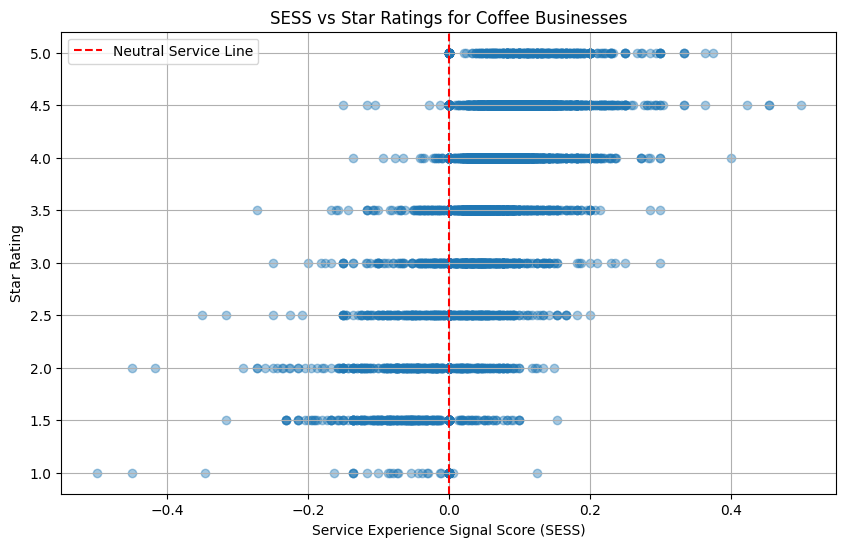

In [165]:
plt.figure(figsize=(10, 6))

plt.scatter(
    metrics_df["SESS"],
    metrics_df["stars"],
    alpha=0.4
)

plt.axvline(0, color="red", linestyle="--", label="Neutral Service Line")
plt.xlabel("Service Experience Signal Score (SESS)")
plt.ylabel("Star Rating")
plt.title("SESS vs Star Ratings for Coffee Businesses")
plt.legend()
plt.grid(True)
plt.show()

In [172]:
import pandas as pd

def compute_ofi_per_business(reviews_df):
    results = []

    for business_id, group in reviews_df.groupby("business_id"):
        reviews = group["text"].dropna().tolist()
        if len(reviews) == 0:
            continue

        _, ofi = compute_sess_and_ofi(reviews)

        results.append({
            "business_id": business_id,
            "review_count": len(reviews),
            "ofi": ofi
        })

    return pd.DataFrame(results)
coffee_ofi_df = compute_ofi_per_business(coffee_reviews)
coffee_ofi_df.head()


,business_id,review_count,ofi
0,-0epFLgYq2C1Jo_W4FOBKw,18,0.000000
1,-0gRYq5UjMtZbELj0KHxzA,133,0.037594
2,-0iIxySkp97WNlwK66OGWg,233,0.055794
3,-2BDt9OdGiBONysWCdKgNg,17,0.176471
4,-2dvQxx3cYXd5XmFdDDsDA,27,0.037037


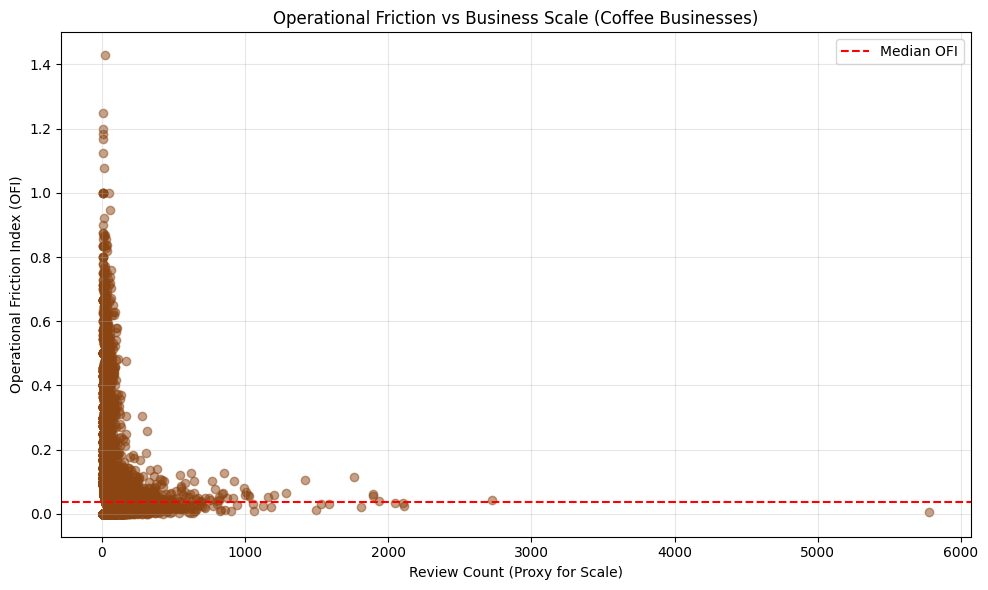

In [174]:
coffee_ofi_df = coffee_ofi_df.merge(
    coffee_df[["business_id", "name", "stars"]],
    on="business_id",
    how="left"
)

plt.figure(figsize=(10, 6))

plt.scatter(
    coffee_ofi_df["review_count"],
    coffee_ofi_df["ofi"],
    alpha=0.5,
    color="#8B4513"
)

plt.axhline(
    coffee_ofi_df["ofi"].median(),
    linestyle="--",
    color="red",
    label="Median OFI"
)

plt.xlabel("Review Count (Proxy for Scale)")
plt.ylabel("Operational Friction Index (OFI)")
plt.title("Operational Friction vs Business Scale (Coffee Businesses)")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [170]:
star_threshold = 3.5
sess_threshold = 0.01
ofi_threshold = 0.15
metrics_df["risk_flag"] = (
    (metrics_df["stars"] < star_threshold) &
    (metrics_df["SESS"] < sess_threshold) &
    (metrics_df["OFI"] > ofi_threshold)
)

high_risk = metrics_df[metrics_df["risk_flag"]]
high_risk.head()


,business_id,stars,SESS,OFI,review_count,risk_flag
7,-3dkEoYgH8AlUtBMZvzUfg,2.5,0.000000,0.333333,21,True
13,-7Rx5jVeQmlVoAU_oXrzew,1.0,-0.136364,0.454545,11,True
38,-QbbFXdiWQb2vKaDIky4Pw,2.5,0.000000,0.583333,12,True
44,-TboXPMTf45s24FPyD8OAA,2.0,0.000000,0.230769,52,True
48,-Wv0KRW7vv77bjOKLrxpXg,2.5,0.000000,0.153846,13,True


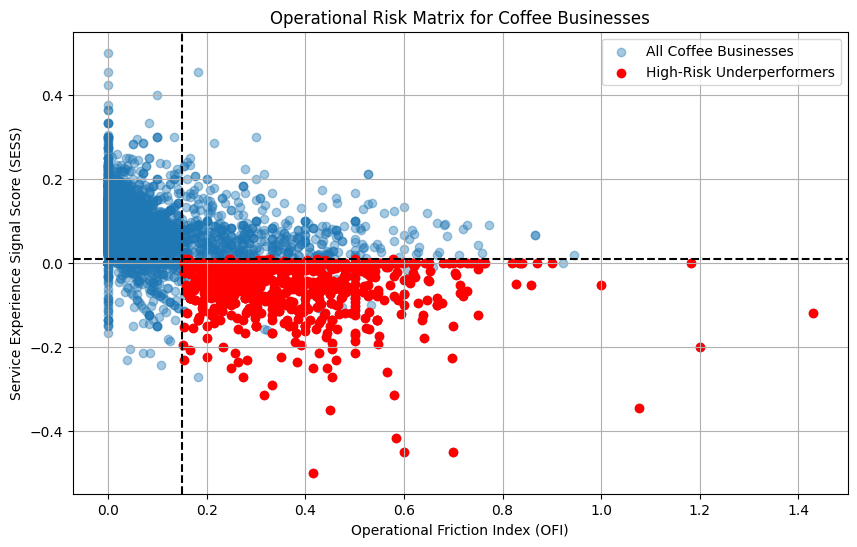

In [171]:
plt.figure(figsize=(10, 6))

plt.scatter(
    metrics_df["OFI"],
    metrics_df["SESS"],
    alpha=0.4,
    label="All Coffee Businesses"
)

plt.scatter(
    high_risk["OFI"],
    high_risk["SESS"],
    color="red",
    label="High-Risk Underperformers"
)

plt.axhline(sess_threshold, color="black", linestyle="--")
plt.axvline(ofi_threshold, color="black", linestyle="--")

plt.xlabel("Operational Friction Index (OFI)")
plt.ylabel("Service Experience Signal Score (SESS)")
plt.title("Operational Risk Matrix for Coffee Businesses")
plt.legend()
plt.grid(True)
plt.show()